# Figures data Prades



### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import re
import seaborn as sns
from statannotations.Annotator import Annotator

In [2]:
# Conversion Fm (Fraction Modern) to $\Delta$^14^C
def fm_D14C(fm,yr,lft=8267):
    dcy=fm*np.exp((1950-yr)/lft)
    D14C=(dcy-1)*1000
    return D14C

#Conversion $\Delta$^14^C to Fm (Fraction Modern)
def D14C_fm(D14C,yr,lft=8267):
    fm=(D14C/1000+1)*np.exp((yr-1950)/lft)
    return fm

In [3]:
control=[5,7,9,10]
drought=[2,3,4,6]

### Carbon stocks

In [4]:
#con=pd.read_csv('~\\Model_Prades\\Data\\Prades_data_control.csv')
#dro=pd.read_csv('~\\Model_Prades\\Data\\Prades_data_drought.csv')
con=pd.read_csv('Data/Prades_data_control.csv')
dro=pd.read_csv('Data/Prades_data_drought.csv')

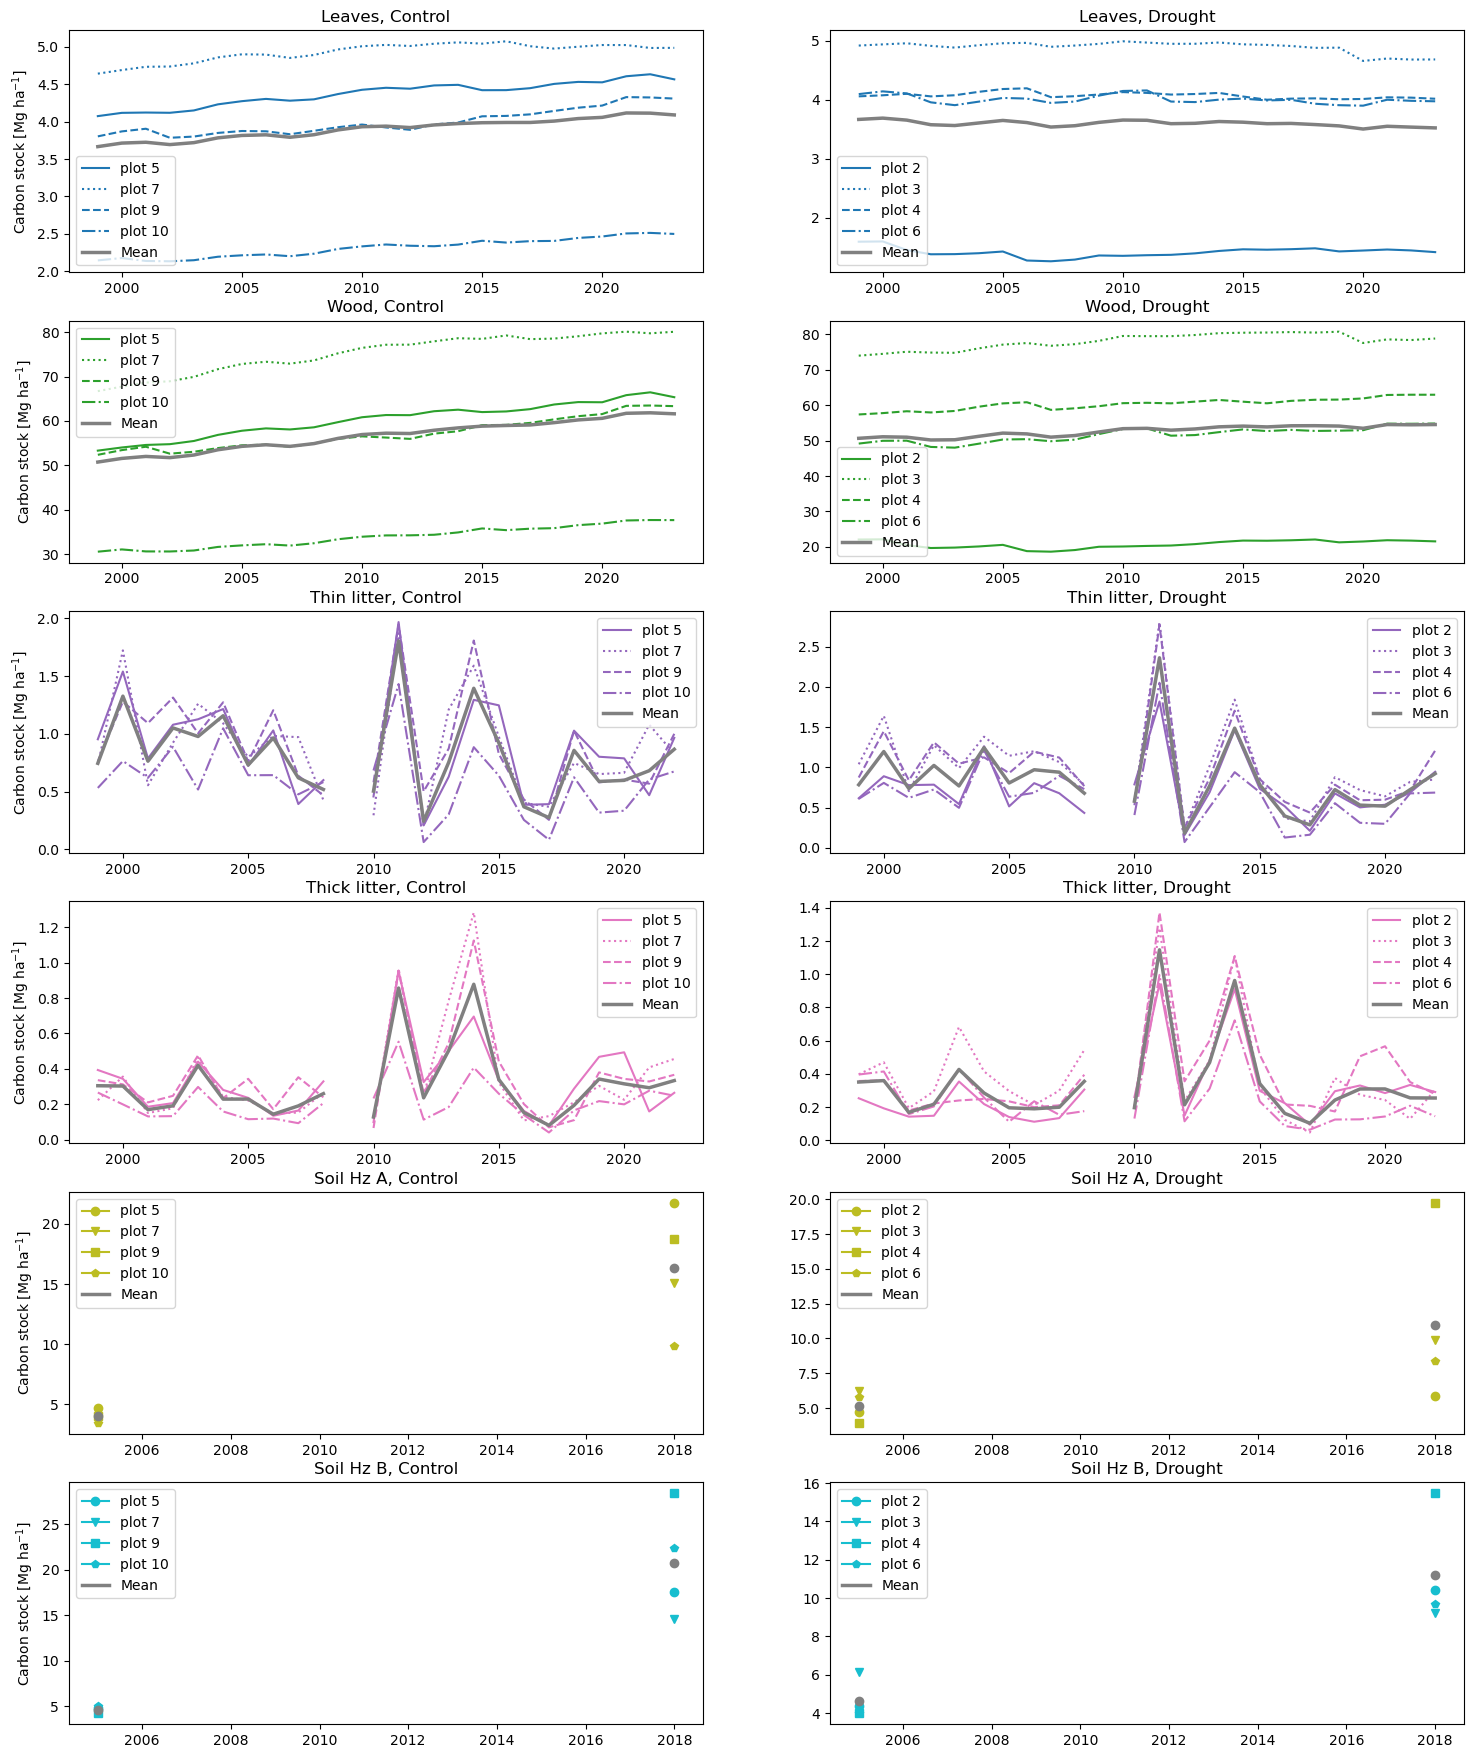

In [6]:
linestyle=['solid','dotted','dashed','dashdot']
markers=['o','v','s','p']
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,6))

fig,axs=plt.subplots(6,2,figsize=[18,22])
for j in range(6):
    for i in range(4):
        if j<=3:
            axs[j,0].plot(con[con.Plot==control[i]].Year,con[con.Plot==control[i]][con.columns[j+2]],color=colors[j],linestyle=linestyle[i],label='plot '+str(control[i]))
            axs[j,1].plot(dro[dro.Plot==drought[i]].Year,dro[dro.Plot==drought[i]][dro.columns[j+2]],color=colors[j],linestyle=linestyle[i],label='plot '+str(drought[i]))
        else:
            axs[j,0].plot(con[con.Plot==control[i]].Year,con[con.Plot==control[i]][con.columns[j+2]],marker=markers[i],color=colors[j],label='plot '+str(control[i]))
            axs[j,1].plot(dro[dro.Plot==drought[i]].Year,dro[dro.Plot==drought[i]][dro.columns[j+2]],marker=markers[i],color=colors[j],label='plot '+str(drought[i]))
        
        # Means       
        if i==3:
            w=con[['Year',con.columns[j+2]]]
            mean=np.zeros(25)
            for k in range(1999,2024):mean[k-1999]=w[w.Year==k].mean().iloc[1]
            axs[j,0].plot(con[con.Plot==control[0]].Year,mean,color='gray',label='Mean',linewidth=2.5)
            if j>3:axs[j,0].plot(con[con.Plot==control[0]].Year,mean,'o',color='gray')
           
            w=dro[['Year',dro.columns[j+2]]]
            mean=np.zeros(25)
            for k in range(1999,2024):mean[k-1999]=w[w.Year==k].mean().iloc[1]
            axs[j,1].plot(dro[dro.Plot==drought[0]].Year,mean,color='gray',label='Mean',linewidth=2.5)
            if j>3:axs[j,1].plot(dro[dro.Plot==drought[0]].Year,mean,'o',color='gray')

    axs[j,0].legend();axs[j,1].legend()
    axs[j,0].set_title(str(con.columns[j+2])+', Control'); axs[j,1].set_title(str(dro.columns[j+2])+', Drought')
    axs[j,0].set_ylabel('Carbon stock [Mg ha$^{-1}$]')
        
fig.savefig('Figures/Base_Carbon_stocks_timeseries.pdf',bbox_inches="tight")

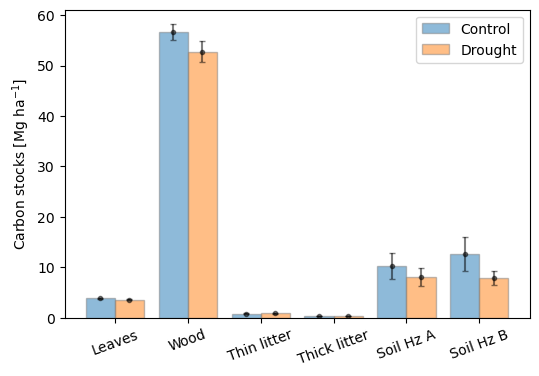

In [8]:
tit=con.columns[2:]
mm=np.zeros([2,6]); sd=np.zeros([2,6])
for i in range(len(tit)):
    mm[0,i]=con[tit[i]].mean(); sd[0,i]=con[tit[i]].std()/np.sqrt(len(con[~con[tit[i]].isna()]))
    mm[1,i]=dro[tit[i]].mean(); sd[1,i]=dro[tit[i]].std()/np.sqrt(len(dro[~dro[tit[i]].isna()]))

fig=plt.subplots(figsize=(6,4)) 
barWidth=0.4 
br1=np.arange(len(tit)) 
br2=[x+barWidth for x in br1] 

plt.bar(br1,mm[0,],width=barWidth,edgecolor='grey',label ='Control',alpha=0.5) 
plt.bar(br2,mm[1,],width=barWidth,edgecolor='grey',label ='Drought',alpha=0.5) 
plt.errorbar(br1,mm[0,],sd[0,],fmt='.',color='Black',alpha=0.5,capsize=2)
plt.errorbar(br2,mm[1,],sd[1,],fmt='.',color='Black',alpha=0.5,capsize=2)
plt.ylabel('Carbon stocks [Mg ha$^{-1}$]') 
plt.xticks([r+barWidth/2 for r in range(len(tit))],tit,rotation=20)
plt.legend()

plt.savefig('Figures/Base_Carbon_stocks_mean.pdf',bbox_inches="tight")

### Demographic structure

In [9]:
#data=pd.read_excel('~\\Model_Prades\\Data\\Estructura demográfica Prades.xlsx')
data=pd.read_excel('Data/Estructura demográfica Prades.xlsx')

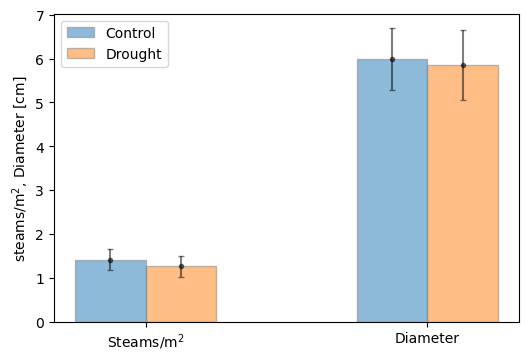

In [10]:
con=data[data['treatment']=='control']
dro=data[data['treatment']=='drought']

fig=plt.subplots(figsize=(6,4)) 
barWidth=0.25 
br1=np.arange(2) 
br2=[x+barWidth for x in br1]

plt.bar(br1,con[con.columns[2:]].mean(),width=barWidth,edgecolor='grey',label ='Control',alpha=0.5) 
plt.bar(br2,dro[dro.columns[2:]].mean(),width=barWidth,edgecolor='grey',label ='Drought',alpha=0.5) 

plt.errorbar(br1,con[con.columns[2:]].mean(),con[con.columns[2:]].std()/2,fmt='.',color='Black',alpha=0.5,capsize=2)
plt.errorbar(br2,dro[dro.columns[2:]].mean(),dro[dro.columns[2:]].std()/2,fmt='.',color='Black',alpha=0.5,capsize=2)
plt.ylabel('steams/m$^2$, Diameter [cm]') 
plt.xticks([r+barWidth/2 for r in range(2)],['Steams/m$^2$','Diameter'])
plt.legend()

plt.savefig('Figures/Base_demographic_structure.pdf',bbox_inches="tight")

### Meteo variables

In [11]:
#data=pd.read_csv('~\\Model_Prades\\Data\\Climate\\Prades_hourly.csv')
data=pd.read_csv('Data/Climate/Prades_hourly.csv')

data['datetime']=pd.to_datetime(data.datetime)

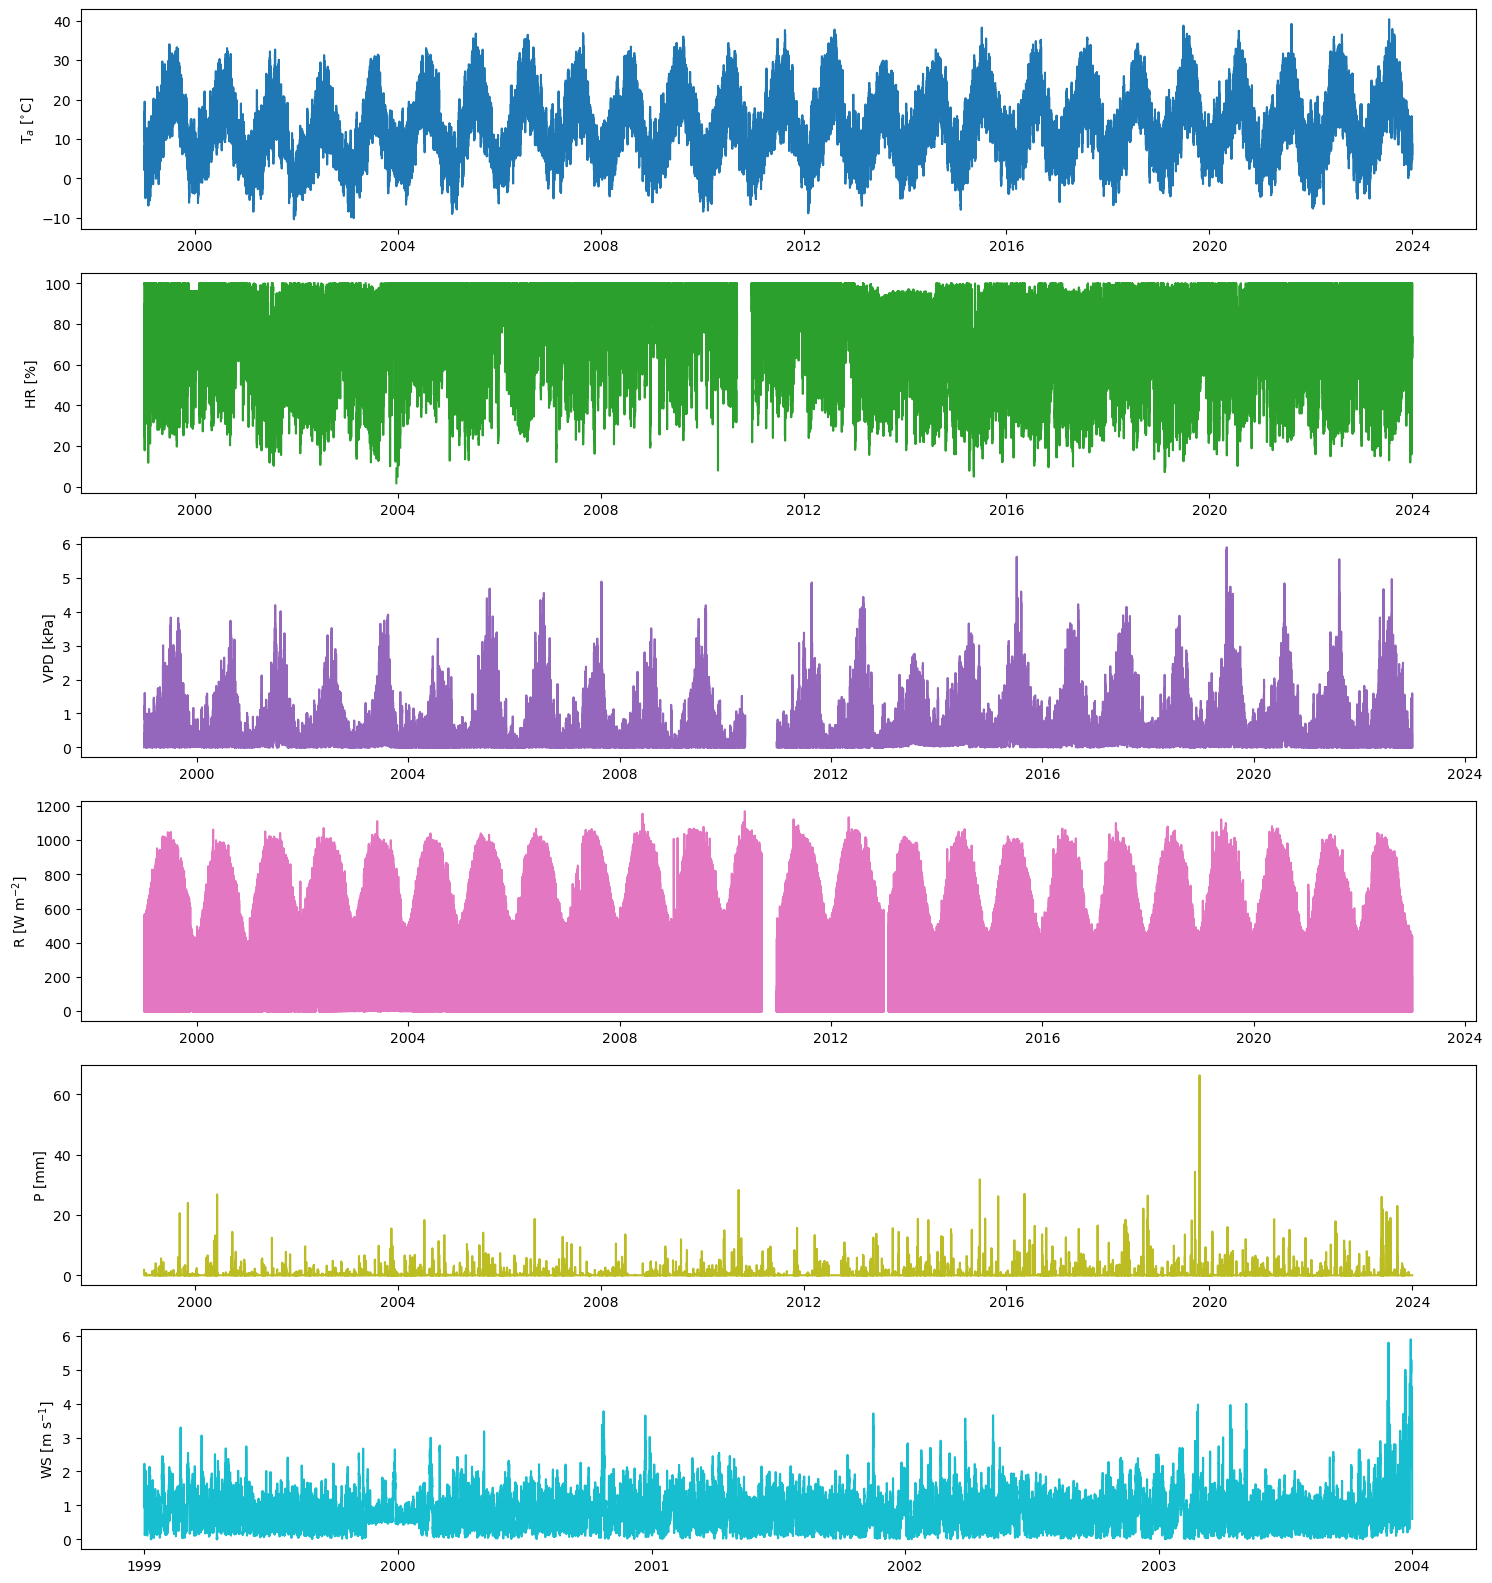

In [12]:
fig,axs=plt.subplots(6,1,figsize=[18,20])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,6))
axs[0].plot(data.datetime,data.Ta,color=colors[0])
axs[0].set_ylabel('T$_a$ [$^{\\circ}$C]')

axs[1].plot(data.datetime,data.HR,color=colors[1])
axs[1].set_ylabel('HR [%]')

axs[2].plot(data.datetime,data.VPD,color=colors[2])
axs[2].set_ylabel('VPD [kPa]')

axs[3].plot(data.datetime,data.R,color=colors[3])
axs[3].set_ylabel('R [W m$^{-2}$]')
                  
axs[4].plot(data.datetime,data.P,color=colors[4])
axs[4].set_ylabel('P [mm]')

#axs[5].plot(data.datetime,data.maxWS,color=colors[0])
axs[5].plot(data.datetime,data.meanWS,color=colors[5])
axs[5].set_ylabel('WS [m s$^{-1}$]')


fig.savefig('Figures/Base_meteo_variables.pdf',bbox_inches="tight")

In [69]:
----->>>> voy aqui. Revisar si tengo datos de 2024.

SyntaxError: invalid syntax (778299118.py, line 1)

### Meteo variables during the field trip (30-04 to 03-05 2023)

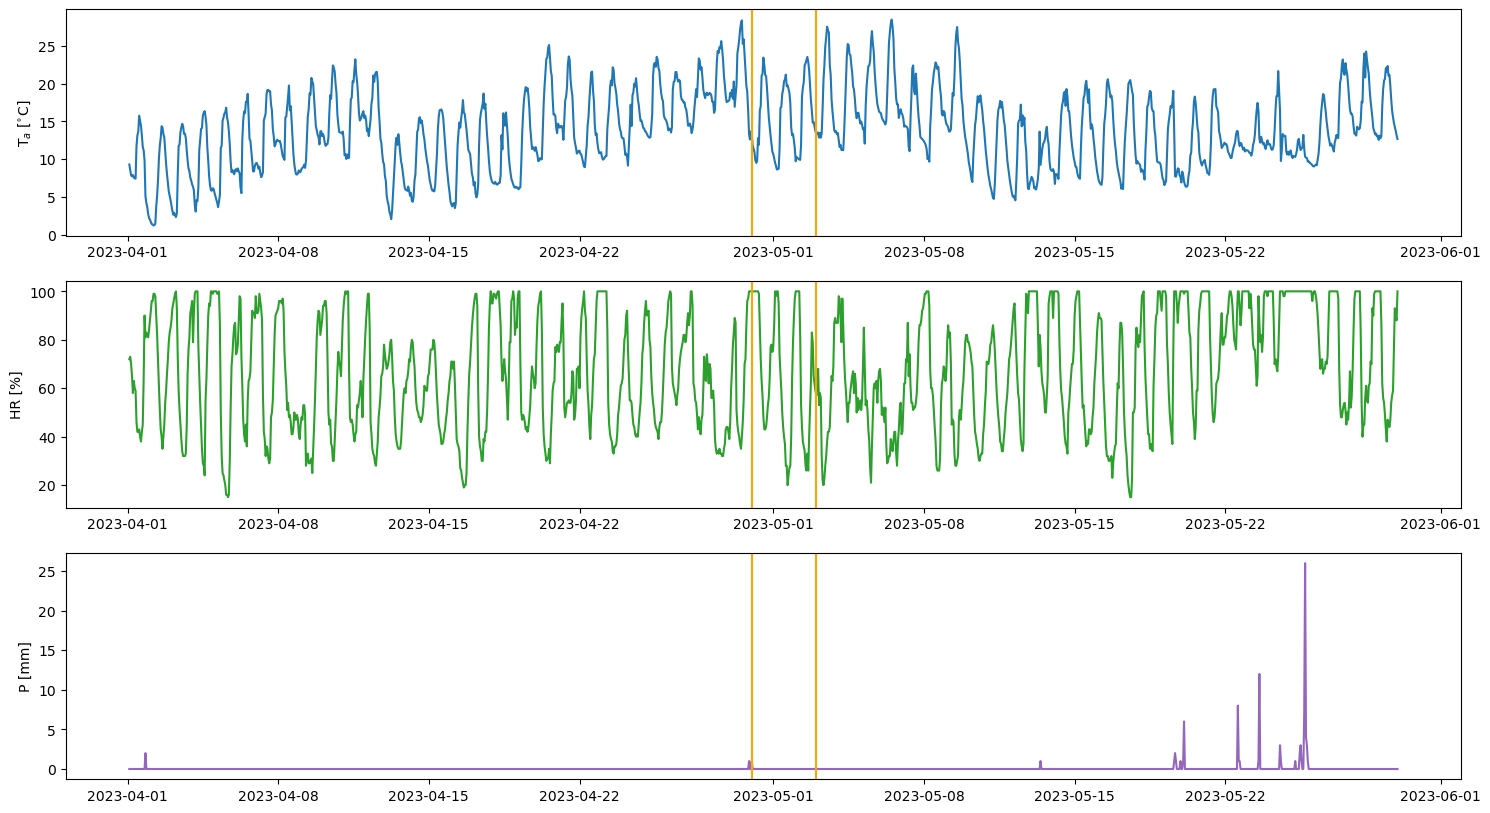

In [13]:
mask=(data.datetime > '2023-4-1 01:00:00') & (data.datetime < '2023-5-30 01:00:00')
data_ft=data.loc[mask]

fig,axs=plt.subplots(3,1,figsize=[18,10])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,6))
axs[0].plot(data_ft.datetime,data_ft.Ta,color=colors[0])
axs[0].set_ylabel('T$_a$ [$^{\\circ}$C]')
axs[0].axvline(dt.datetime(2023,4,30),color='orange')
axs[0].axvline(dt.datetime(2023,5,3),color='orange')

axs[1].plot(data_ft.datetime,data_ft.HR,color=colors[1])
axs[1].set_ylabel('HR [%]')
axs[1].axvline(dt.datetime(2023,4,30),color='orange')
axs[1].axvline(dt.datetime(2023,5,3),color='orange')

axs[2].plot(data_ft.datetime,data_ft.P,color=colors[2])
axs[2].set_ylabel('P [mm]')
axs[2].axvline(dt.datetime(2023,4,30),color='orange')
axs[2].axvline(dt.datetime(2023,5,3),color='orange')

# #axs[5].plot(data.datetime,data.maxWS,color=colors[0])
# axs[5].plot(data.datetime,data.meanWS,color=colors[5])
# axs[5].set_ylabel('WS [m s$^{-1}$]')

### Soil moisture

In [14]:
#data_sm=pd.read_excel('~\\Model_Prades\\Data\\Climate\\Soil_Moisture\\SM_Prades.xlsx')
data_sm=pd.read_excel('Data/Climate/Soil_moisture/SM_Prades.xlsx')
data_sm['datetime']=pd.to_datetime(data_sm.dia)
data_sm.loc[(data_sm['Hum sòl (% v/v)']<0) | (data_sm['Hum sòl (% v/v)']>100),'Hum sòl (% v/v)']=np.nan

/tmp/ipykernel_20720/1114419682.py:17: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  for k in range(len(times)):mean[k]=w[w.datetime==times[k]].mean().iloc[1]


IndexError: single positional indexer is out-of-bounds

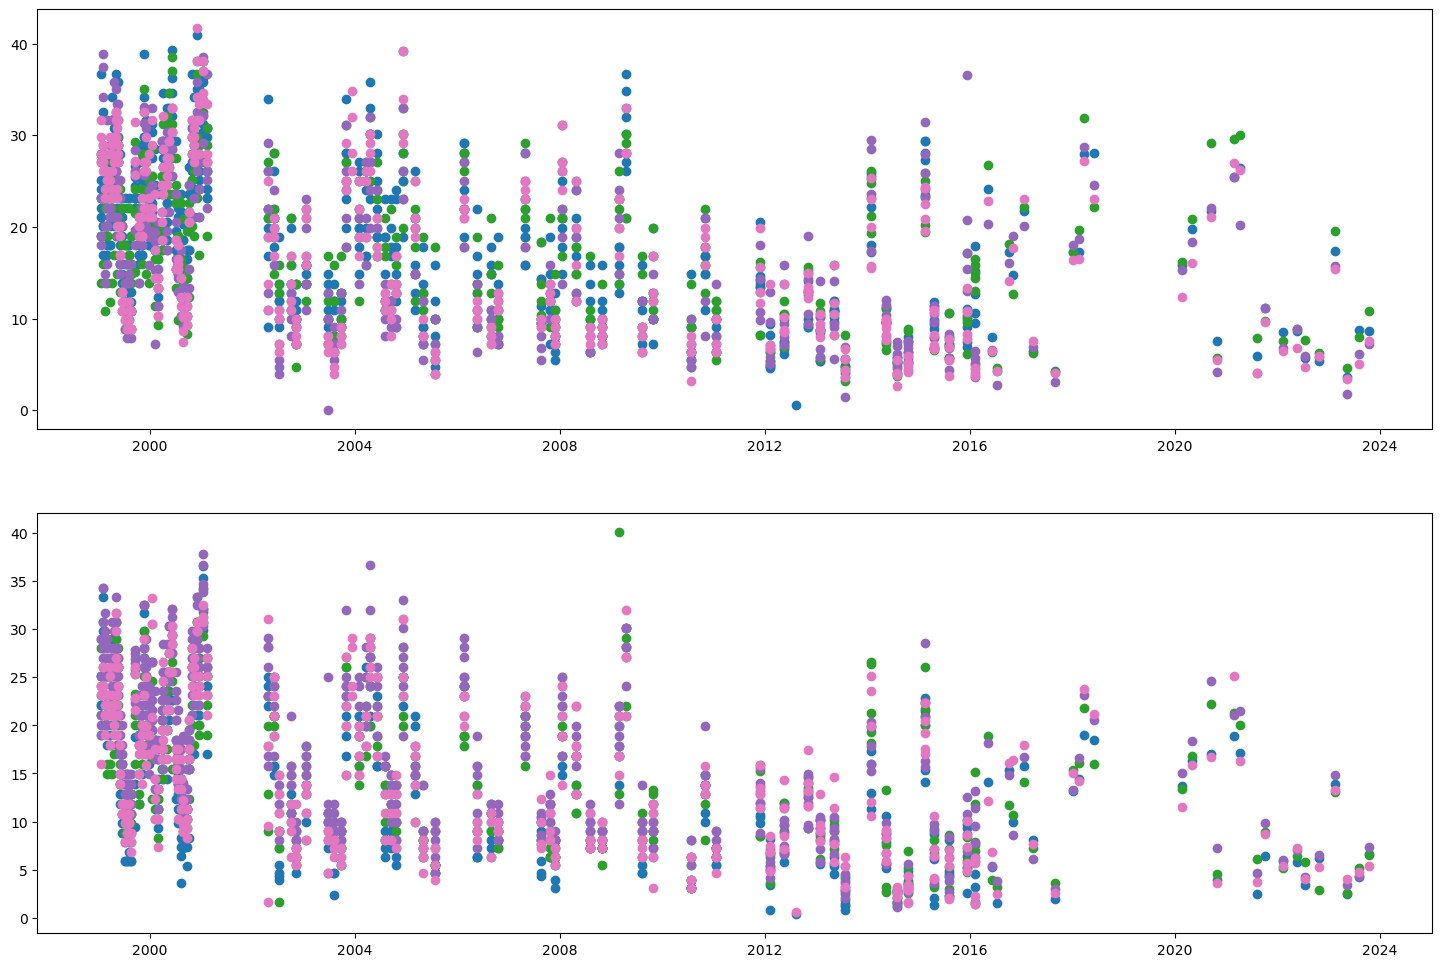

In [15]:
con=data_sm[data_sm.tractament=='control']
dro=data_sm[data_sm.tractament=='sequera']

fig,axs=plt.subplots(2,1,figsize=[18,12])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,6))

for i in range(4):
    axs[0].plot(con[con['parcel.la']==control[i]].datetime,con[con['parcel.la']==control[i]]['Hum sòl (% v/v)'],
                'o',color=colors[i],label='plot '+str(control[i]))
    axs[1].plot(dro[dro['parcel.la']==drought[i]].datetime,dro[dro['parcel.la']==drought[i]]['Hum sòl (% v/v)'],
                'o',color=colors[i],label='plot '+str(drought[i]))
    if i==3:
        w=con[['datetime',con.columns[4]]]
        times=w.datetime.unique().tolist()
        mean=np.zeros(len(times))
        for k in range(len(times)):mean[k]=w[w.datetime==times[k]].mean().iloc[1]
        axs[0].plot(times,mean,color='gray',label='Mean',linewidth=2.5)
        
        w=dro[['datetime',dro.columns[4]]]
        times=w.datetime.unique().tolist()
        mean=np.zeros(len(times))
        for k in range(len(times)):mean[k]=w[w.datetime==times[k]].mean().iloc[1]
        axs[1].plot(times,mean,color='gray',label='Mean',linewidth=2.5)
    
axs[0].set_ylim(0,45); axs[1].set_ylim(0,45)      
axs[0].set_ylabel('Soil moisture [%]'); axs[1].set_ylabel('Soil moisture [%]') 
axs[0].legend();axs[1].legend()
axs[0].set_title('Control plots'); axs[1].set_title('Drought plots')

## Data from field trip

### Carbon and nitrogen -- Soil

In [17]:
data=pd.read_excel('Data/LabResults/Solids_soil_Ctotal-Ntotal.xlsx',header=11)

depths=data.SN2.unique()
temp=re.compile("([a-zA-Z]+)([0-9]+)")
plot=np.empty(len(data),dtype=int);treat=['']*len(data)
for i in range(len(data)):
    b=data['Sample name'][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
    if plot[i] in control: treat[i]='Control'
    if plot[i] in drought: treat[i]='Drought'
data['plot']=plot; data['treatment']=treat

con=data[data['plot'].isin(control)] 
dro=data[data['plot'].isin(drought)] 

/tmp/ipykernel_20720/2225516530.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  res2[i,j]=w2.Result.mean();std2[i,j]=w2.Result.std()/np.sqrt(len(w[~w.Result.isna()]))
/home/_ehoyos/anaconda3/envs/bgc_md2/lib/python3.9/site-packages/matplotlib/axes/_base.py:2539: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/tmp/ipykernel_20720/2225516530.py:47: RuntimeWarning: divide by zero encountered in double_scalars
  res2[i,j]=w2.Result.mean();std2[i,j]=w2.Result.std()/np.sqrt(len(w[~w.Result.isna()]))


Text(0.5, 1.0, 'Nitrogen, drought plots')

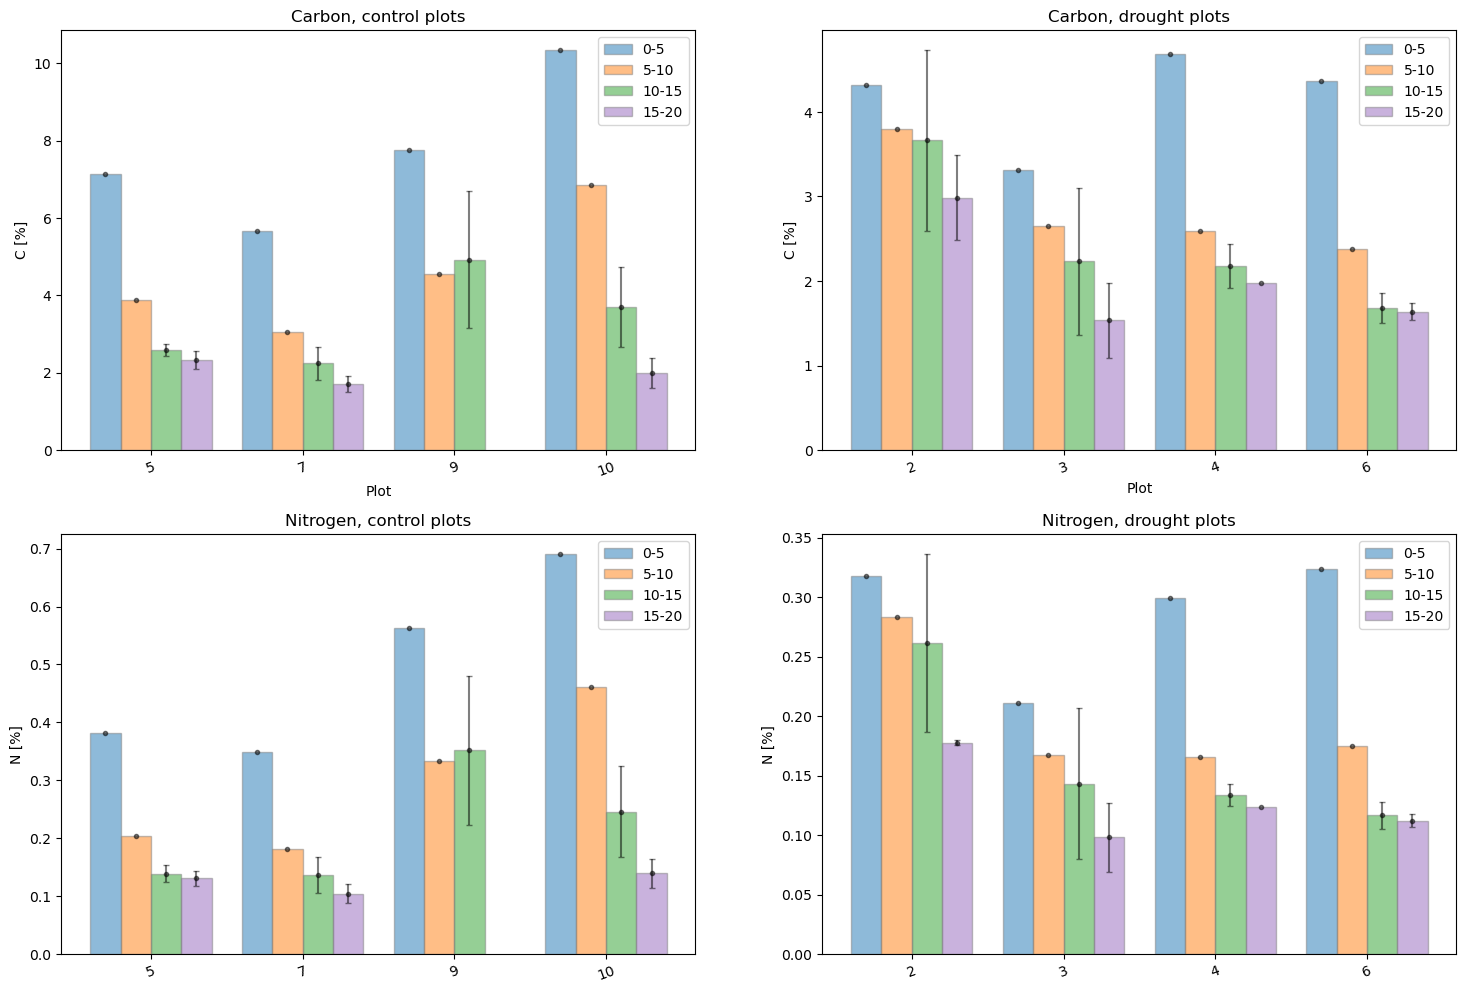

In [18]:
conC=con[con.Parameter=='Ctotal']; droC=dro[dro.Parameter=='Ctotal']
conN=con[con.Parameter=='Ntotal']; droN=dro[dro.Parameter=='Ntotal']
fig,axs=plt.subplots(2,2,figsize=[18,12])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))

barWidth=0.20
br1=np.arange(4)
br2=[x+barWidth for x in br1] 
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]
br=[br1,br2,br3,br4]

## Carbon
res1=np.zeros([4,len(depths)])*np.nan; std1=np.zeros([4,len(depths)])*np.nan
res2=np.zeros([4,len(depths)])*np.nan; std2=np.zeros([4,len(depths)])*np.nan
for i in range(4):
    for j in range(len(depths)):
        w=conC[(conC['plot']==control[i])&(conC['SN2']==depths[j])]
        res1[i,j]=w.Result.mean();std1[i,j]=w.Result.std()/np.sqrt(len(w[~w.Result.isna()]))
        w2=droC[(droC['plot']==drought[i])&(droC['SN2']==depths[j])]
        res2[i,j]=w2.Result.mean();std2[i,j]=w2.Result.std()/np.sqrt(len(w[~w.Result.isna()]))

for i in range(len(depths)):
    axs[0,0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0,0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[0,1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0,1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0,0].legend()
axs[0,0].set_xticks([r+barWidth*1.5 for r in range(len(control))],control,rotation=20)
axs[0,0].set_ylabel('C [%]');axs[0,0].set_xlabel('Plot')
axs[0,0].set_title('Carbon, control plots')
axs[0,1].legend()
axs[0,1].set_xticks([r+barWidth*1.5 for r in range(len(drought))],drought,rotation=20)
axs[0,1].set_ylabel('C [%]');axs[0,1].set_xlabel('Plot')
axs[0,1].set_title('Carbon, drought plots')    

##Nitrogen

res1=np.zeros([4,len(depths)])*np.nan; std1=np.zeros([4,len(depths)])*np.nan
res2=np.zeros([4,len(depths)])*np.nan; std2=np.zeros([4,len(depths)])*np.nan
for i in range(4):
    for j in range(len(depths)):
        w=conN[(conN['plot']==control[i])&(conN['SN2']==depths[j])]
        res1[i,j]=w.Result.mean();std1[i,j]=w.Result.std()/np.sqrt(len(w[~w.Result.isna()]))
        w2=droN[(droN['plot']==drought[i])&(droN['SN2']==depths[j])]
        res2[i,j]=w2.Result.mean();std2[i,j]=w2.Result.std()/np.sqrt(len(w[~w.Result.isna()]))

for i in range(len(depths)):
    axs[1,0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[1,0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[1,1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[1,1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[1,0].legend()
axs[1,0].set_xticks([r+barWidth*1.5 for r in range(len(control))],control,rotation=20)
axs[1,0].set_ylabel('N [%]');axs[0,0].set_xlabel('Plot')
axs[1,0].set_title('Nitrogen, control plots')
axs[1,1].legend()
axs[1,1].set_xticks([r+barWidth*1.5 for r in range(len(drought))],drought,rotation=20)
axs[1,1].set_ylabel('N [%]');axs[0,1].set_xlabel('Plot')
axs[1,1].set_title('Nitrogen, drought plots') 

Text(0.5, 1.0, 'Nitrogen')

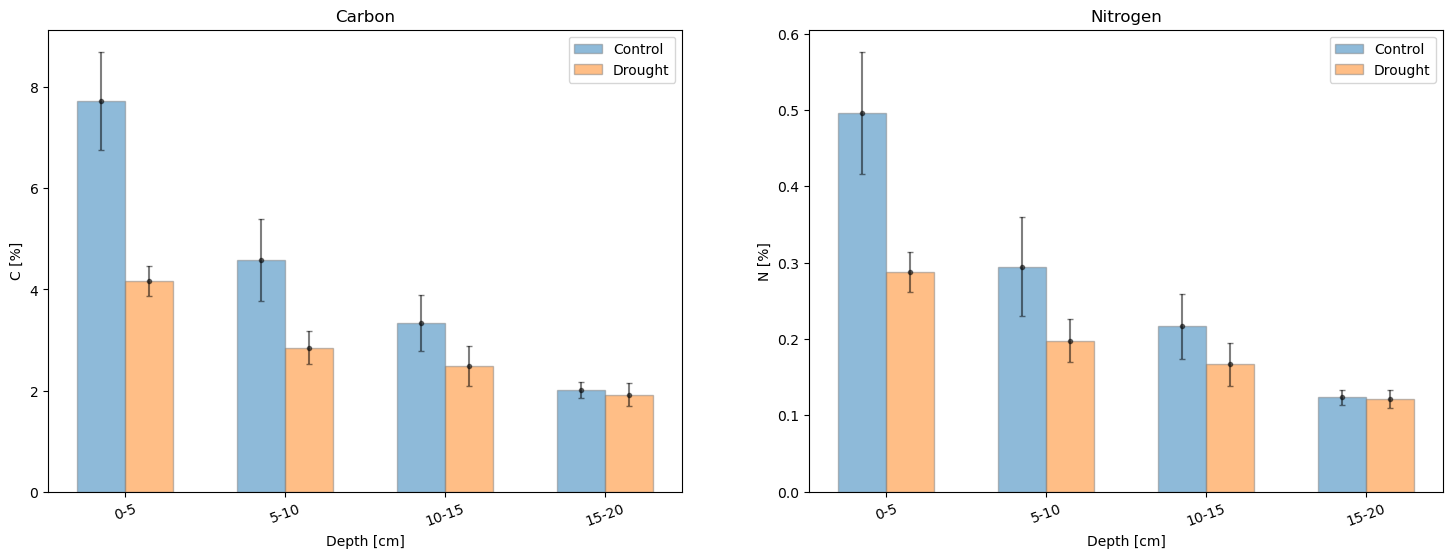

In [19]:
fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
treat=['Control','Drought']

barWidth=0.3
br1=np.arange(4)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

## Carbon
res=np.zeros([2,len(depths)])*np.nan; std=np.zeros([2,len(depths)])*np.nan
for j in range(len(depths)):
    w=conC[conC['SN2']==depths[j]]
    res[0,j]=w.Result.mean();std[0,j]=w.Result.std()/np.sqrt(len(w[~w.Result.isna()]))
    w=droC[droC['SN2']==depths[j]]
    res[1,j]=w.Result.mean();std[1,j]=w.Result.std()/np.sqrt(len(w[~w.Result.isna()]))
for i in range(2):
    axs[0].bar(br[i],res[i,:],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    axs[0].errorbar(br[i],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0].legend()
axs[0].set_xticks([r+barWidth/2 for r in range(len(depths))],depths,rotation=20)
axs[0].set_ylabel('C [%]');axs[0].set_xlabel('Depth [cm]')
axs[0].set_title('Carbon')

## Nitrogen
res=np.zeros([2,len(depths)])*np.nan; std=np.zeros([2,len(depths)])*np.nan
for j in range(len(depths)):
    w=conN[conN['SN2']==depths[j]]
    res[0,j]=w.Result.mean();std[0,j]=w.Result.std()/np.sqrt(len(w[~w.Result.isna()]))
    w=droN[droN['SN2']==depths[j]]
    res[1,j]=w.Result.mean();std[1,j]=w.Result.std()/np.sqrt(len(w[~w.Result.isna()]))
for i in range(2):
    axs[1].bar(br[i],res[i,:],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    axs[1].errorbar(br[i],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[1].legend()
axs[1].set_xticks([r+barWidth/2 for r in range(len(depths))],depths,rotation=20)
axs[1].set_ylabel('N [%]');axs[1].set_xlabel('Depth [cm]')
axs[1].set_title('Nitrogen')

##### Statistical test

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5-10_Control vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.331e-02 Stat=4.083e+00
0-5_Control vs. 0-5_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.092e-02 Stat=5.333e+00
10-15_Control vs. 10-15_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.103e-01 Stat=2.550e+00
15-20_Control vs. 15-20_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:6.639e-01 Stat=1.888e-01


Text(0.5, 14.722222222222216, 'Depth [cm]')

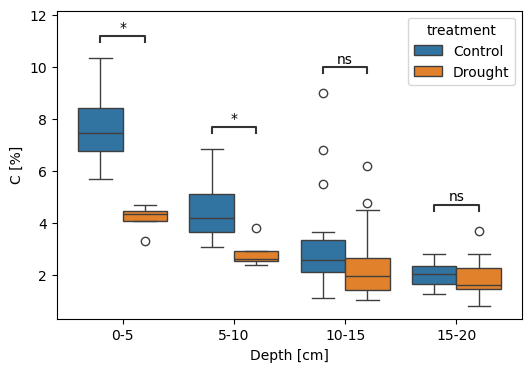

In [20]:
dataC=data[data.Parameter=='Ctotal']
fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

pairs = [
    [('0-5', 'Control'), ('0-5', 'Drought')],
    [('5-10', 'Control'), ('5-10', 'Drought')],
    [('10-15', 'Control'), ('10-15', 'Drought')],
    [('15-20', 'Control'), ('15-20', 'Drought')],
]

states_palette = sns.color_palette("tab10", n_colors=2)
states_order = treat
subcat_order = depths
hue_plot_params = {
    'data': dataC,
    'x': "SN2",
    'y': "Result",
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs.set_ylabel('C [%]');axs.set_xlabel('Depth [cm]')
##t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene*, Wilcoxon, Kruskal, Brunner-Munzel

In [21]:
dataC

,BGC#,Sample name,SN2,SN3,SN4,SN5,BoxNo,BoxPos,Sample year,Number,...,Error,Unit,Instrument,Meas.date,Weight (mg),Muffle furnace,Comment,Sampling date,plot,treatment
0,NaN,PD_P10_S,0-5,NaN,NaN,NaN,33,A1,2024,6791,...,NaN,%,Elementaranalyse VarioMAX CN,2024-06-20,259.38,N,NaN,NaN,10,Control
2,NaN,PD_P10_S,5-10,NaN,NaN,NaN,33,A2,2024,6792,...,NaN,%,Elementaranalyse VarioMAX CN,2024-06-20,255.38,N,NaN,NaN,10,Control
4,NaN,PD_P10_S_25,10-15,NaN,NaN,NaN,33,A3,2024,6793,...,NaN,%,Elementaranalyse VarioMAX CN,2024-06-20,264.28,N,NaN,NaN,10,Control
6,NaN,PD_P10_S_25,15-20,NaN,NaN,NaN,33,A4,2024,6794,...,NaN,%,Elementaranalyse VarioMAX CN,2024-06-20,248.07,N,NaN,NaN,10,Control
8,NaN,PD_P10_S_26,10-15,NaN,NaN,NaN,33,A5,2024,6795,...,NaN,%,Elementaranalyse VarioMAX CN,2024-06-20,260.28,N,NaN,NaN,10,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,NaN,PD_P2_S_6,10-15,NaN,NaN,NaN,33,G6,2024,6856,...,NaN,%,Elementaranalyse VarioMAX CN,2024-07-02,260.11,N,NaN,NaN,2,Drought
132,NaN,PD_P2_S_7,10-15,NaN,NaN,NaN,33,G7,2024,6857,...,NaN,%,Elementaranalyse VarioMAX CN,2024-07-02,252.10,N,NaN,NaN,2,Drought
134,NaN,PD_P2_S_7,15-20,NaN,NaN,NaN,33,G8,2024,6858,...,NaN,%,Elementaranalyse VarioMAX CN,2024-07-02,249.00,N,NaN,NaN,2,Drought
136,NaN,PD_P2_S_8,10-15,NaN,NaN,NaN,33,G9,2024,6859,...,NaN,%,Elementaranalyse VarioMAX CN,2024-07-02,250.26,N,NaN,NaN,2,Drought


### Amount of carbon

/tmp/ipykernel_40937/1604271688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataC["Bulkden"]=np.nan
/tmp/ipykernel_40937/1604271688.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataC['totalC']=(dataC["Bulkden"]*dataC["Result"]/100*5)*1e-6/1e-8 # total C in t C/ha.


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5-10_Control vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.331e-02 Stat=4.083e+00
0-5_Control vs. 0-5_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.092e-02 Stat=5.333e+00
10-15_Control vs. 10-15_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.103e-01 Stat=2.550e+00
15-20_Control vs. 15-20_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:6.639e-01 Stat=1.888e-01


Text(0.5, 14.722222222222216, 'Depth [cm]')

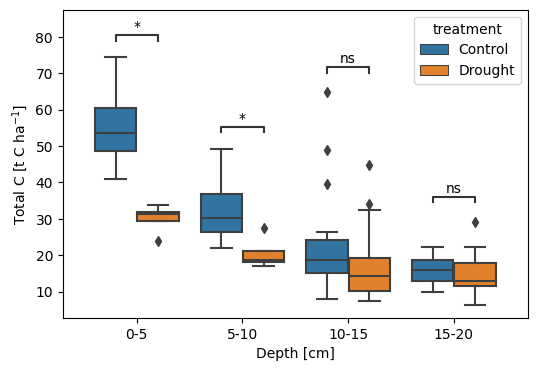

In [362]:
da0_15=1.44 # bulk density Horizon A (0-15cm) [g/cm3].
da15_30=1.58 # bulk density Horizon A (0-15cm) [g/cm3].

dataC["Bulkden"]=np.nan
dataC.loc[dataC['SN2'].isin(depths[:-1]),'Bulkden']=da0_15
dataC.loc[dataC['SN2']==depths[-1],'Bulkden']=da15_30

dataC['totalC']=(dataC["Bulkden"]*dataC["Result"]/100*5)*1e-6/1e-8 # total C in t C/ha.

fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

pairs = [
    [('0-5', 'Control'), ('0-5', 'Drought')],
    [('5-10', 'Control'), ('5-10', 'Drought')],
    [('10-15', 'Control'), ('10-15', 'Drought')],
    [('15-20', 'Control'), ('15-20', 'Drought')],
]

states_palette = sns.color_palette("tab10", n_colors=2)
states_order = treat
subcat_order = depths
hue_plot_params = {
    'data': dataC,
    'x': "SN2",
    'y': "totalC",
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs.set_ylabel('Total C [t C ha$^{-1}$]');axs.set_xlabel('Depth [cm]')


In [380]:
dataC.totalC[(dataC.SN2==depths[2])&(dataC.treatment=='Drought')].mean()

17.91862232208251

### Carbon -- Vegetation (Roots, Fine litter, Coarse litter)

In [89]:
df1=pd.read_excel('Data/LabResults/Veg_d13C_C_Box1.xls',sheet_name=1,header=10)
df2=pd.read_excel('Data/LabResults/Veg_d13C_C_Box2.xls',sheet_name=1,header=10)
data=pd.concat([df1, df2]); data=data.reset_index(drop=True)
temp=re.compile("([a-zA-Z]+)([0-9]+)")
plot=np.empty(len(data),dtype=int); depth=['']*len(data)

poold=data.columns[2]
roots=data[data[poold]=='Roots']; roots=roots.reset_index(drop=True)
litterF=data[data[poold]=='Fine Litter']; litterF=litterF.reset_index(drop=True)
litterC=data[data[poold]=='Coarse Litter ']; litterC=litterC.reset_index(drop=True)

temp=re.compile("([a-zA-Z]+)([0-9]+)")
plot=np.empty(len(roots),dtype=int); depth=['']*len(roots);treat=['']*len(roots)
for i in range(len(roots)):
    b=roots[roots.columns[3]][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
    depth[i]=(roots[roots.columns[3]][i].split('_')[-1]).split(' ')[-1]
    if plot[i] in control: treat[i]='Control'
    if plot[i] in drought: treat[i]='Drought'
roots['plot']=plot; roots['depth']=depth; roots['treatment']=treat 

plot=np.empty(len(litterF),dtype=int);treat=['']*len(litterF)
for i in range(len(litterF)):
    b=litterF[litterF.columns[3]][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
    if plot[i] in control: treat[i]='Control'
    if plot[i] in drought: treat[i]='Drought'
litterF['plot']=plot; litterF['treatment']=treat 

plot=np.empty(len(litterC),dtype=int);treat=['']*len(litterC)
for i in range(len(litterC)):
    b=litterC[litterC.columns[3]][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
    if plot[i] in control: treat[i]='Control'
    if plot[i] in drought: treat[i]='Drought'
litterC['plot']=plot; litterC['treatment']=treat 

Text(0.5, 1.0, 'Course litter, drought plots')

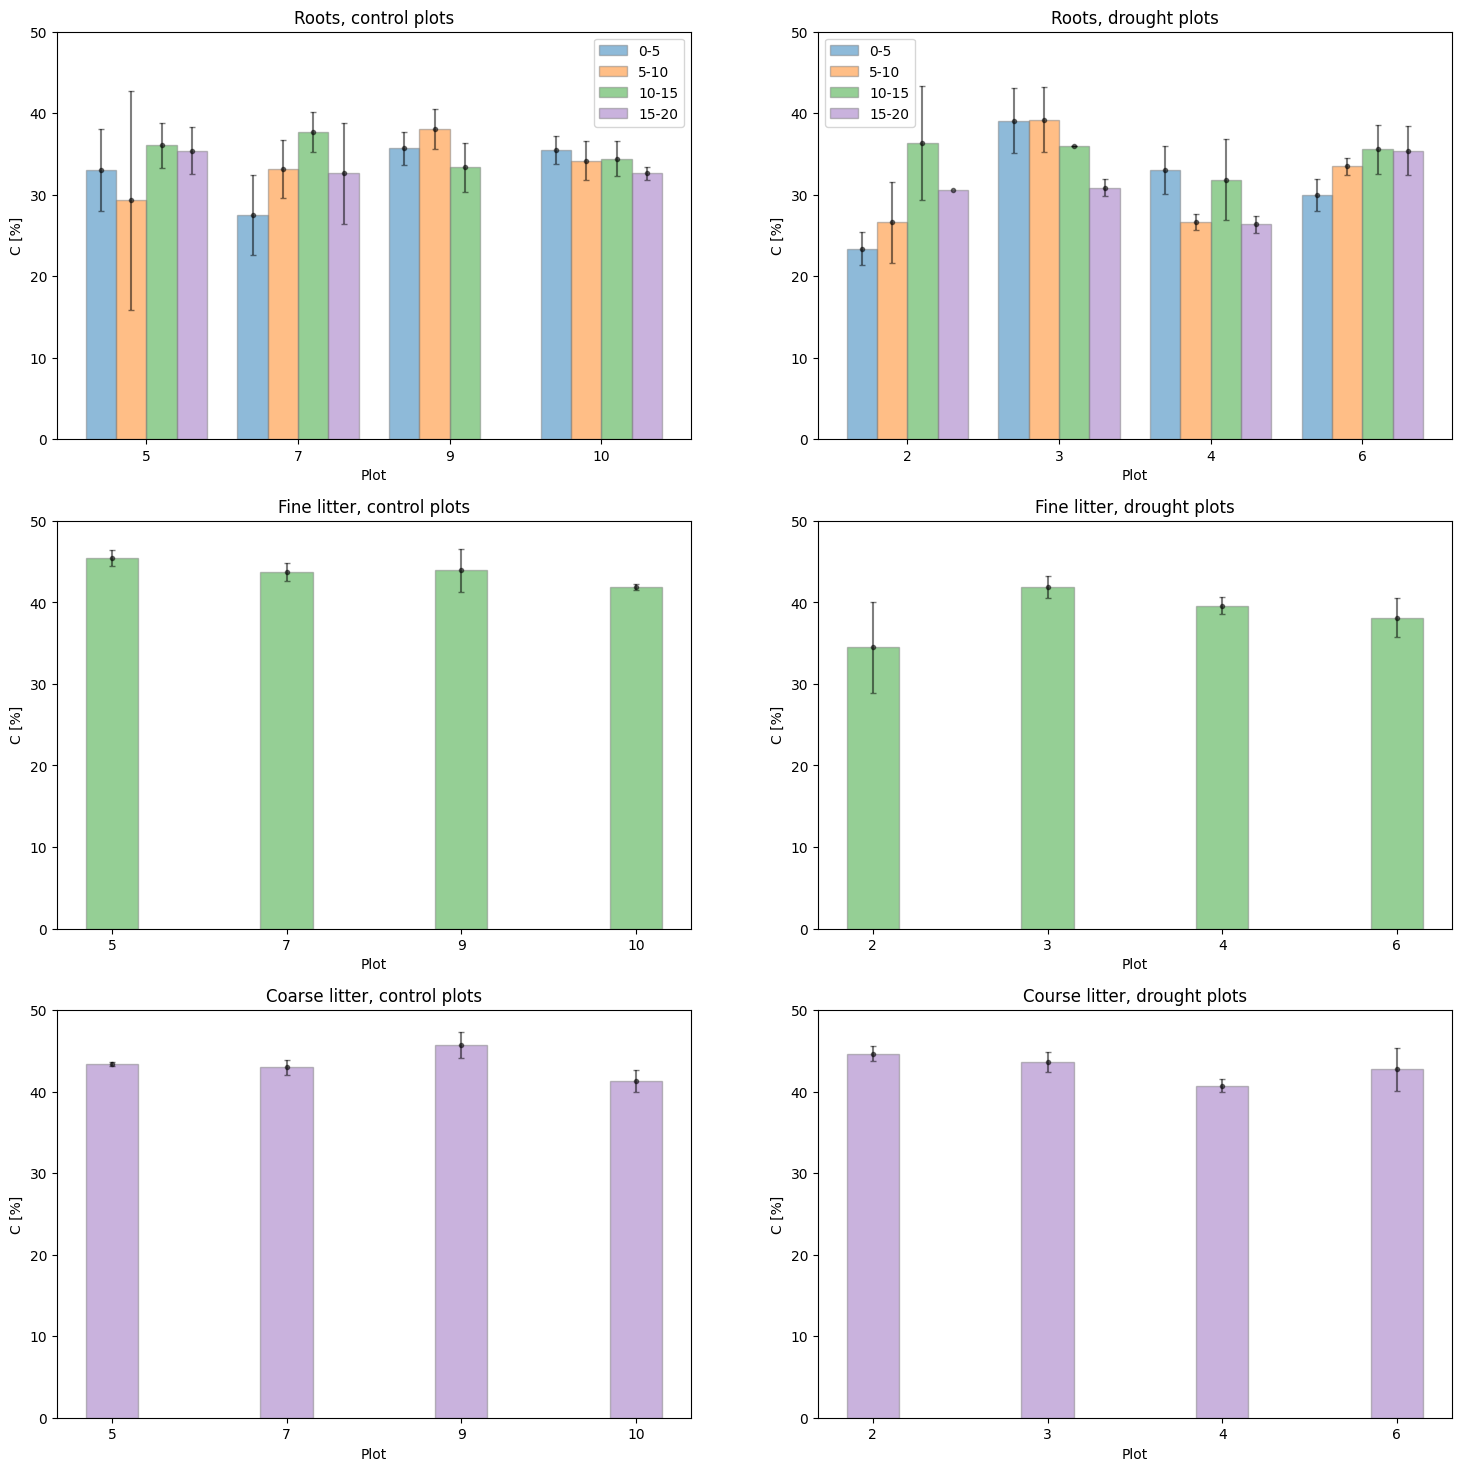

In [90]:
fig,axs=plt.subplots(3,2,figsize=[18,18])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
barWidth=0.20

## Roots
depths=roots.depth.unique()
df=roots
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)] 

res1=np.zeros([4,len(depths)])*np.nan; std1=np.zeros([4,len(depths)])*np.nan
res2=np.zeros([4,len(depths)])*np.nan; std2=np.zeros([4,len(depths)])*np.nan
for i in range(4):
    for j in range(len(depths)):
        w=con[(con['plot']==control[i])&(con['depth']==depths[j])]
        res1[i,j]=w.concentration.mean();std1[i,j]=w.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))
        w=dro[(dro['plot']==drought[i])&(dro['depth']==depths[j])]
        res2[i,j]=w.concentration.mean();std2[i,j]=w.concentration.std()//np.sqrt(len(w[~w.concentration.isna()]))

br1=np.arange(len(depths))
br2=[x+barWidth for x in br1] 
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]
br=[br1,br2,br3,br4]

for i in range(len(depths)):
    axs[0,0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0,0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[0,1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0,1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0,0].legend();axs[0,1].legend()
axs[0,0].set_xticks([r+barWidth*1.5 for r in range(len(control))],control)
axs[0,1].set_xticks([r+barWidth*1.5 for r in range(len(drought))],drought)
axs[0,0].set_ylabel('C [%]');axs[0,1].set_ylabel('C [%]')
axs[0,0].set_xlabel('Plot'); axs[0,1].set_xlabel('Plot')
axs[0,0].set_title('Roots, control plots'); axs[0,1].set_title('Roots, drought plots')
axs[0,0].set_ylim(0,50); axs[0,1].set_ylim(0,50)

# Fine litter
df=litterF
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)] 

res=np.zeros([2,4])*np.nan; std=np.zeros([2,4])*np.nan
#res2=np.zeros(4)*np.nan; std2=np.zeros(4)*np.nan
for i in range(4):
    w=con[con['plot']==control[i]]
    res[0,i]=w.concentration.mean();std[0,i]=w.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))
    w=dro[dro['plot']==drought[i]]
    res[1,i]=w.concentration.mean();std[1,i]=w.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))
for i in range(2):
    axs[1,i].bar(br[0],res[i,:],width=barWidth+.1,edgecolor='grey',color=colors[2],alpha=0.5) 
    axs[1,i].errorbar(br[0],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[1,i].set_ylabel('C [%]'); axs[1,i].set_xlabel('Plot'); axs[1,i].set_ylim(0,50)
axs[1,0].set_xticks([r for r in range(len(control))],control)
axs[1,1].set_xticks([r for r in range(len(drought))],drought)
axs[1,0].set_title('Fine litter, control plots'); axs[1,1].set_title('Fine litter, drought plots')

# Course litter
df=litterC
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)] 

res=np.zeros([2,4])*np.nan; std=np.zeros([2,4])*np.nan
for i in range(4):
    w=con[con['plot']==control[i]]
    res[0,i]=w.concentration.mean();std[0,i]=w.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))
    w=dro[dro['plot']==drought[i]]
    res[1,i]=w.concentration.mean();std[1,i]=w.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))
for i in range(2):
    axs[2,i].bar(br[0],res[i,:],width=barWidth+.1,edgecolor='grey',color=colors[3],alpha=0.5) 
    axs[2,i].errorbar(br[0],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[2,i].set_ylabel('C [%]'); axs[2,i].set_xlabel('Plot'); axs[2,i].set_ylim(0,50)
axs[2,0].set_xticks([r for r in range(len(control))],control)
axs[2,1].set_xticks([r for r in range(len(drought))],drought)
axs[2,0].set_title('Coarse litter, control plots'); axs[2,1].set_title('Course litter, drought plots')


Text(0.5, 1.0, 'Litter')

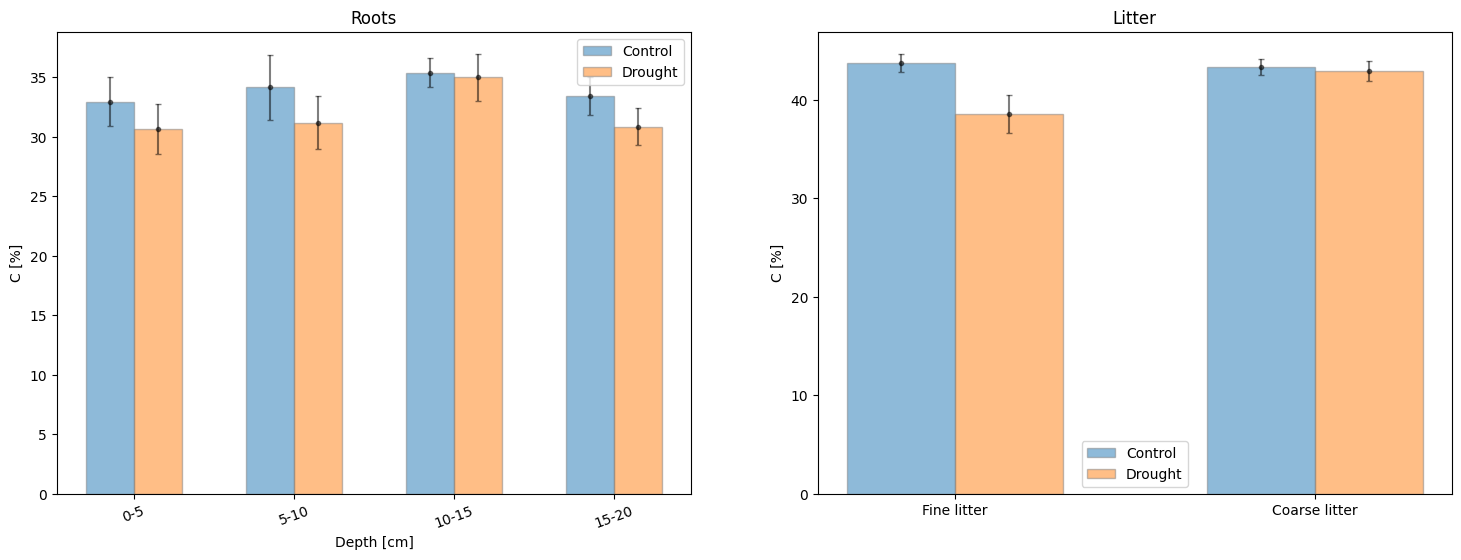

In [91]:
fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
barWidth=0.20

# Roots
depths=roots.depth.unique()
df=roots
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)]

res=np.zeros([2,len(depths)])*np.nan; std=np.zeros([2,len(depths)])*np.nan
for j in range(len(depths)):
    w=con[con['depth']==depths[j]]
    res[0,j]=w.concentration.mean();std[0,j]=w.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))
    w=dro[dro['depth']==depths[j]]
    res[1,j]=w.concentration.mean();std[1,j]=w.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))

treat=['Control','Drought']
barWidth=0.3
br1=np.arange(4)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

for i in range(2):
    axs[0].bar(br[i],res[i,:],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    axs[0].errorbar(br[i],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0].legend()
axs[0].set_xticks([r+barWidth/2 for r in range(len(depths))],depths,rotation=20)
axs[0].set_ylabel('C [%]');axs[0].set_xlabel('Depth [cm]')
axs[0].set_title('Roots')

## Litter
res=np.zeros([2,2])*np.nan; std=np.zeros([2,4])*np.nan
df=litterF
con=df[df['plot'].isin(control)]; dro=df[df['plot'].isin(drought)] 
res[0,0]=con.concentration.mean();std[0,0]=con.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))
res[0,1]=dro.concentration.mean();std[0,1]=dro.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))
df=litterC
con=df[df['plot'].isin(control)]; dro=df[df['plot'].isin(drought)] 
res[1,0]=con.concentration.mean();std[1,0]=con.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))
res[1,1]=dro.concentration.mean();std[1,1]=dro.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))

barWidth=0.3
br1=np.arange(2)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

for i in range(2):
    axs[1].bar(br[i],res[:,i],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    axs[1].errorbar(br[i],res[:,i],std[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[1].legend()
axs[1].set_xticks([r+barWidth/2 for r in range(2)],['Fine litter','Coarse litter'])
axs[1].set_ylabel('C [%]')
axs[1].set_title('Litter')

##### Statistical test

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5-10_Control vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.530e-01 Stat=1.307e+00
0-5_Control vs. 0-5_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.688e-01 Stat=3.247e-01
10-15_Control vs. 10-15_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:8.312e-01 Stat=4.545e-02
15-20_Control vs. 15-20_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.649e-01 Stat=1.929e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Coarse_Control vs. Coarse_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.529e-01 Stat=5.633e-01
Fine_Control

/tmp/ipykernel_40937/1722466788.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Litter']=a2; b['Litter']=b2
/tmp/ipykernel_40937/1722466788.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Litter']=a2; b['Litter']=b2


Text(0.5, 1.0, 'Litter')

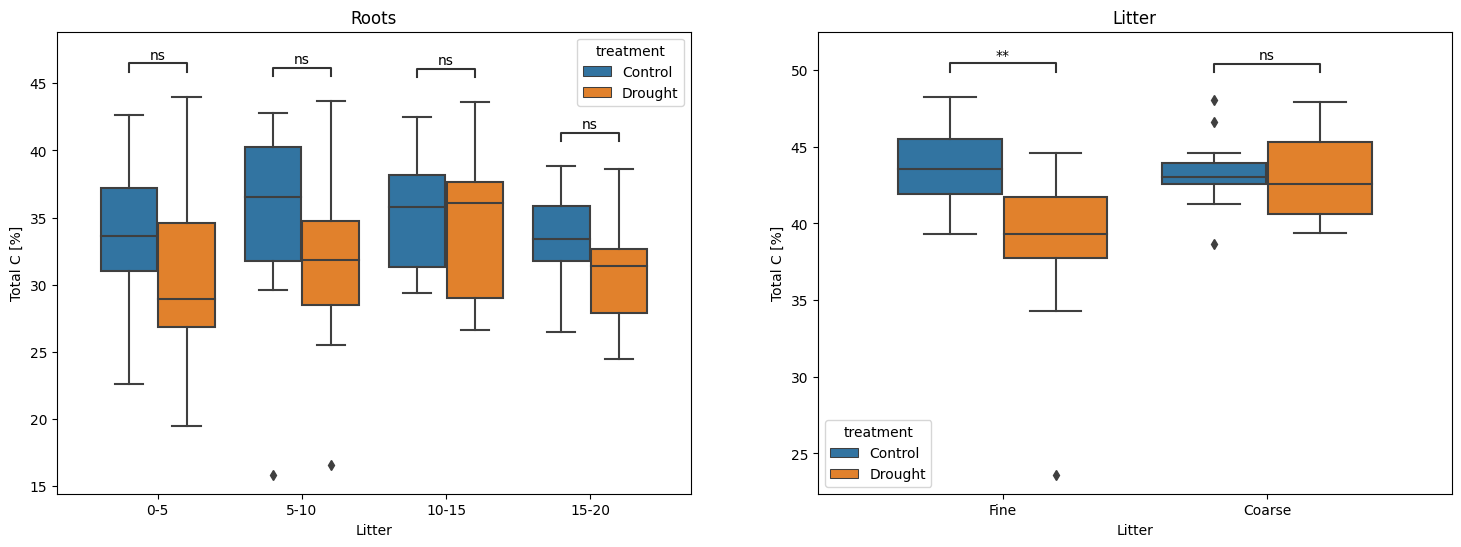

In [123]:
fig,axs=plt.subplots(1,2,figsize=[18,6])
treat=['Control','Drought']

## Roots
pairs = [
    [('0-5', 'Control'), ('0-5', 'Drought')],
    [('5-10', 'Control'), ('5-10', 'Drought')],
    [('10-15', 'Control'), ('10-15', 'Drought')],
    [('15-20', 'Control'), ('15-20', 'Drought')],
]

states_palette = sns.color_palette("tab10", n_colors=2)
states_order = treat
subcat_order = depths
hue_plot_params = {
    'data': roots,
    'x': "depth",
    'y': "concentration",
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs[0], **hue_plot_params)
annotator = Annotator(axs[0], pairs, **hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs[0].set_ylabel('Total C [%]');axs[0].set_xlabel('Depth [cm]')


## Litter
a=litterF[['concentration','plot','treatment']]; b=litterC[['concentration','plot','treatment']]
a2=['Fine']*len(litterF);b2=['Coarse']*len(litterC)
a['Litter']=a2; b['Litter']=b2
litter=pd.concat([a,b])

pairs = [
    [('Fine', 'Control'), ('Fine', 'Drought')],
    [('Coarse', 'Control'), ('Coarse', 'Drought')]
]

states_palette=sns.color_palette("tab10", n_colors=2)
states_order=treat
subcat_order=['Fine','Coarse']
hue_plot_params = {
    'data': litter,
    'x': "Litter",
    'y': "concentration",
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs[1],**hue_plot_params)
annotator=Annotator(axs[1],pairs,**hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs[1].set_ylabel('Total C [%]');axs[0].set_xlabel('Litter')

axs[0].set_title('Roots'); axs[1].set_title('Litter')

### F$^{14}$C and $\Delta^{14}$C from soil respiration 

In [464]:
F14C_at=0.9975615225273415
D14C_at=fm_D14C(F14C_at,2024)

In [426]:
data=pd.read_excel('Data/LabResults/Soil_respiration_field.xlsx',header=30)
data['datetime'] = pd.to_datetime(data['Collection_date'].dt.strftime('%Y-%m-%d') + data['Collection_time'].astype(str), format = '%Y-%m-%d%H:%M:%S')
plot=np.empty(len(data),dtype=int); treatment=['']*len(data)
for i in range(len(data)):
    plot[i]=data['Probe'][i].split('_')[3]
    treatment[i]=data['Probe'][i].split('_')[4]
data['plot']=plot; data['treatment']=treatment

data.loc[data['treatment']=='control','treatment']='Control'
data.loc[data['treatment']=='drought','treatment']='Drought'

con=data[data['plot'].isin(control)] ; conf=con
dro=data[data['plot'].isin(drought)] ; drof=dro

b=data[data.columns[4]]-D14C_at # substract D14C atmospheric
data['D']=b

dataf=data

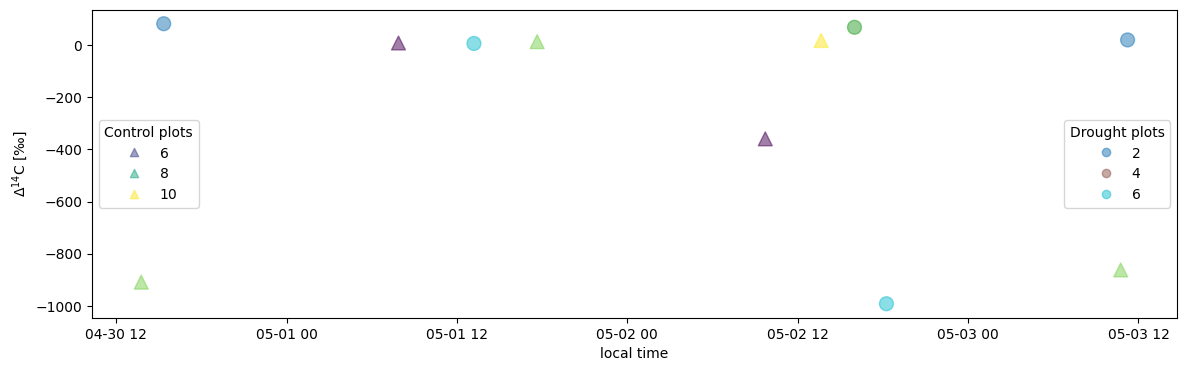

In [409]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'  
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
    
fig=plt.subplots(figsize=[14,4])
scatter1=plt.scatter(con.datetime,con[vv],c=con['plot'],marker='^',alpha=0.5,s=100)
legend1=plt.legend(*scatter1.legend_elements(num=3),title="Control plots",loc="center left")
plt.gca().add_artist(legend1)
scatter2=plt.scatter(dro.datetime,dro[vv],c=dro['plot'],cmap=plt.cm.tab10,marker='o',alpha=0.5,s=100)
plt.ylabel(tity); plt.xlabel('local time')
legend2=plt.legend(*scatter2.legend_elements(num=3),title='Drought plots')

#### Without very negative values

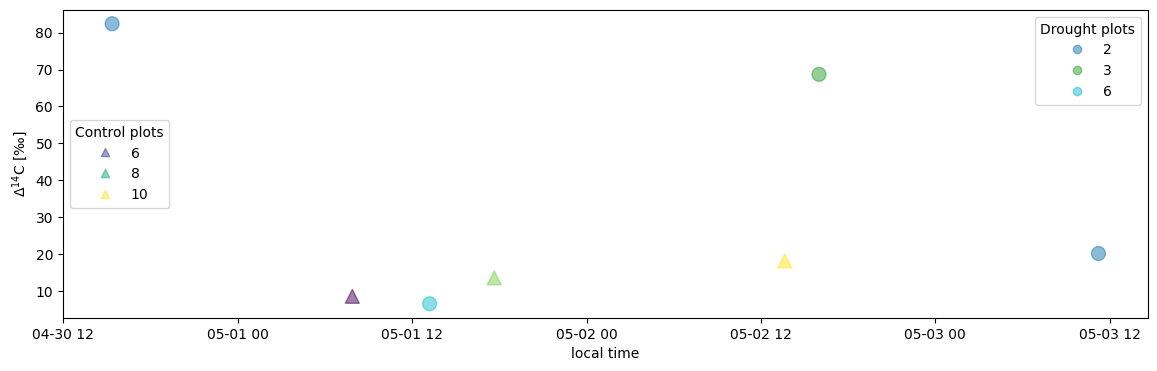

In [410]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'  
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
    
fig=plt.subplots(figsize=[14,4])
con=con[con[con.columns[4]]>-300]
scatter1=plt.scatter(con.datetime,con[vv],c=con['plot'],marker='^',alpha=0.5,s=100)
legend1=plt.legend(*scatter1.legend_elements(num=3),title="Control plots",loc="center left")
plt.gca().add_artist(legend1)
dro=dro[dro[dro.columns[4]]>-300]
scatter2=plt.scatter(dro.datetime,dro[vv],c=dro['plot'],cmap=plt.cm.tab10,marker='o',alpha=0.5,s=100)
plt.ylabel(tity); plt.xlabel('local time')
legend2=plt.legend(*scatter2.legend_elements(),title='Drought plots')

/home/_ehoyos/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


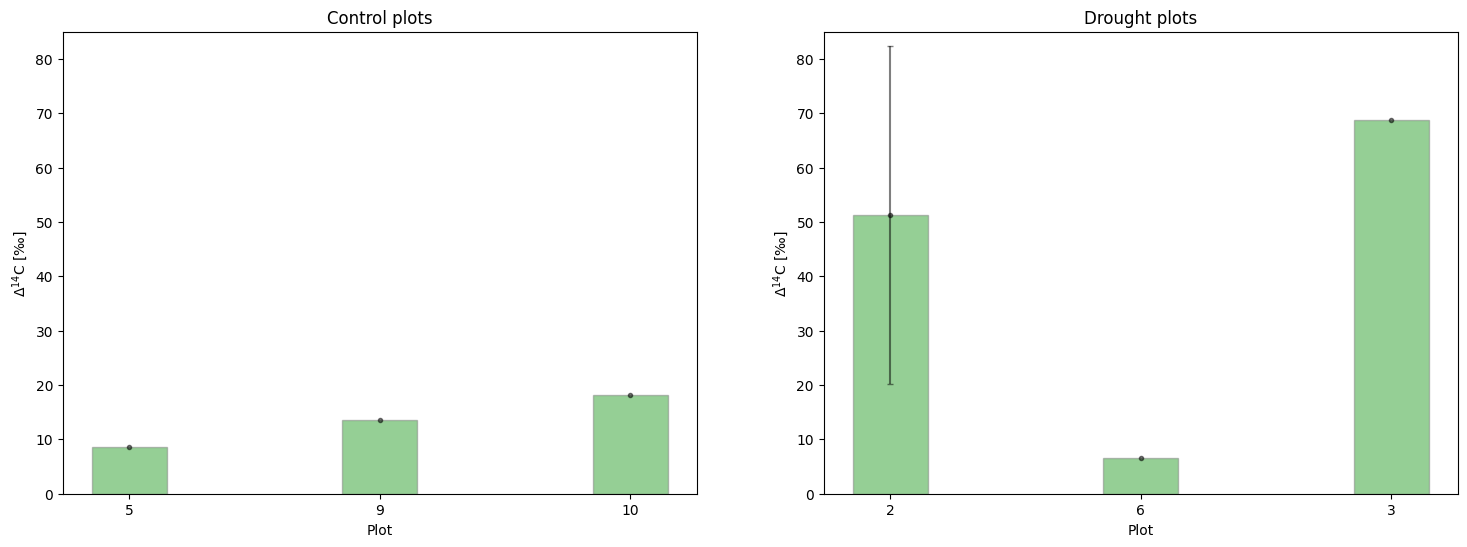

In [411]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'; x1=0; x2=1.2 
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'; x1=0; x2=85

con=data[data['plot'].isin(control)]
dro=data[data['plot'].isin(drought)]

## removing very negative values:
con=con[con[con.columns[4]]>-300]; dro=dro[dro[dro.columns[4]]>-300]

fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))

barWidth=0.30
br=np.arange(3)

res=np.zeros([2,3])*np.nan; std=np.zeros([2,3])*np.nan
control2=con['plot'].unique(); drought2=dro['plot'].unique()
for i in range(3):
    w=con[con['plot']==control2[i]]
    res[0,i]=w[vv].mean();std[0,i]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    w=dro[dro['plot']==drought2[i]]
    res[1,i]=w[vv].mean();std[1,i]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))

axs[0].bar(br,res[0,],width=barWidth,edgecolor='grey',label=control2[i],color=colors[i],alpha=0.5) 
axs[0].errorbar(br,res[0,],std[0,],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[1].bar(br,res[1,],width=barWidth,edgecolor='grey',label=drought[i],color=colors[i],alpha=0.5) 
axs[1].errorbar(br,res[1,],std[1,],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0].set_title('Control plots');axs[1].set_title('Drought plots')
axs[0].set_ylim(x1,x2);axs[1].set_ylim(x1,x2)
axs[0].set_xlabel('Plot');axs[1].set_xlabel('Plot')
axs[0].set_ylabel(tity);axs[1].set_xlabel('Plot'); axs[1].set_ylabel(tity);axs[1].set_xlabel('Plot')
axs[0].set_xticks([r for r in range(len(control2))],control2)
axs[1].set_xticks([r for r in range(len(drought2))],drought2)


(0.0, 0.6)

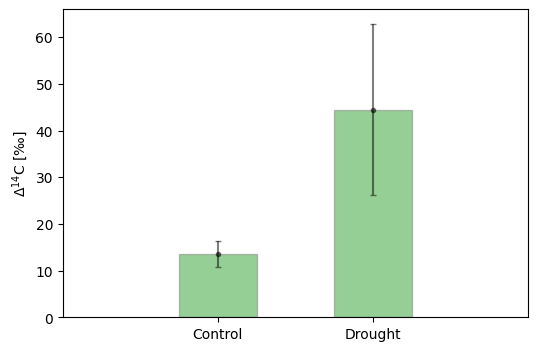

In [412]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'  
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
    
con=data[data['plot'].isin(control)]
dro=data[data['plot'].isin(drought)]

## removing very negative values:
con=con[con[con.columns[4]]>-300]; dro=dro[dro[dro.columns[4]]>-300]

fig=plt.subplots(figsize=(6,4)) 
barWidth=0.1
br=[0.2,0.4]

res=np.zeros(2)*np.nan; std=np.zeros(2)*np.nan
w=con[con[vv].notnull()];res[0]=w[vv].mean(); std[0]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
w=dro[dro[vv].notnull()];res[1]=w[vv].mean(); std[1]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))

plt.bar(br,res,width=barWidth,edgecolor='grey',label=control2[i],color=colors[i],alpha=0.5) 
plt.errorbar(br,res,std,fmt='.',color='Black',alpha=0.5,capsize=2)
plt.ylabel(tity)
plt.xticks([r for r in br],['Control','Drought'])
plt.xlim(0,0.6)

##### Statistical test

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Drought vs. Control: Levene test of variance, P_val:2.240e-03 Stat=3.301e+01


Text(0.5, 14.722222222222216, 'Treatment')

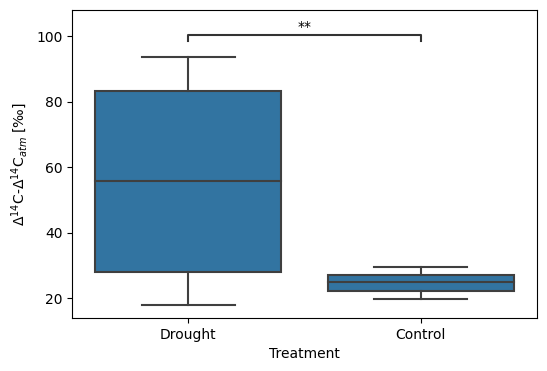

In [415]:
v='A'# F: F14C, D: D14C., A: D14C-D14C_atm
if v=='F':vv=data.columns[2];tity='F$^{14}$C [-]'
if v=='D':vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
if v=='A':vv=data.D; tity='$\Delta^{14}$C-$\Delta^{14}$C$_{atm}$ [‰]'
## Remove very negative values
#df=data
df=data[data[data.columns[4]]>-300]

fig,axs=plt.subplots(figsize=[6,4])
pairs=[[('Control'), ('Drought')]]

states_palette = sns.color_palette("tab10", n_colors=1)
hue_plot_params = {
    'data':df,
    'x': "treatment",
    'y': vv,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Levene').apply_and_annotate()
axs.set_ylabel(tity); axs.set_xlabel('Treatment')

##t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene*, Wilcoxon, Kruskal, Brunner-Munzel

### F$^{14}$C or $\Delta^{14}$C from incubations

In [434]:
data=pd.read_excel('Data/LabResults/Soil_Incubations.xlsx',header=30)

temp=re.compile("([a-zA-Z]+)([0-9]+)")
plot=np.empty(len(data),dtype=int); depth=['']*len(data); treat=['']*len(data)
for i in range(len(data)):
    b=data['Probe'][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
    depth[i]=(data['Probe'][i].split('_')[-1]).split(' ')[-1]
    if plot[i] in control: treat[i]='Control'
    if plot[i] in drought: treat[i]='Drought'
    
data['plot']=plot; data['depth']=depth; data['treatment']=treat 
depths=data.depth.unique()

con=data[data['plot'].isin(control)] 
dro=data[data['plot'].isin(drought)] 

b=data[data.columns[4]]-D14C_at # substract D14C atmospheric
data['D']=b

datai=data

([<matplotlib.axis.XTick at 0x7fde9adfdaf0>,
 [Text(0.125, 0, '0-5'), Text(1.125, 0, '5-10')])

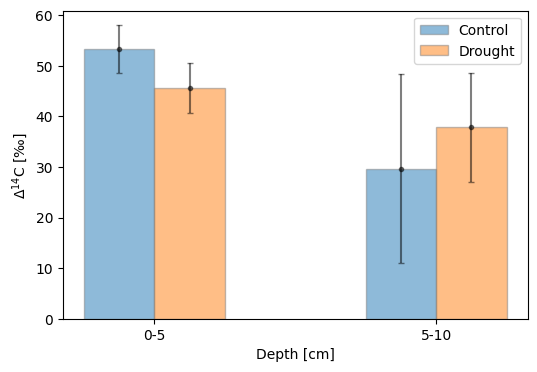

In [440]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'  
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
   
fig=plt.subplots(figsize=(6,4)) 
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
barWidth=0.25 
br1=np.arange(2) 
br2=[x+barWidth for x in br1]

res=np.empty(len(depths));std=np.empty(len(depths))
for i in range(len(depths)):
    res[i]=con[vv][con.depth==depths[i]].mean()
    a=con[vv][con.depth==depths[i]]
    std[i]=a.std()/np.sqrt(len(a[~a.isna()]))
plt.bar(br1,res,width=barWidth,edgecolor='grey',label ='Control',alpha=0.5) 
plt.errorbar(br1,res,std,fmt='.',color='Black',alpha=0.5,capsize=2)

res=np.empty(len(depths));std=np.empty(len(depths))
for i in range(len(depths)):
    res[i]=dro[vv][dro.depth==depths[i]].mean()
    a=dro[vv][dro.depth==depths[i]]
    std[i]=a.std()/np.sqrt(len(a[~a.isna()]))
plt.bar(br2,res,width=barWidth,edgecolor='grey',label='Drought',alpha=0.5) 
plt.errorbar(br2,res,std,fmt='.',color='Black',alpha=0.5,capsize=2)
plt.legend()
plt.ylabel(tity);plt.xlabel('Depth [cm]')
plt.xticks([r+barWidth/2 for r in range(len(depths))],depths)

##### Statistical test

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5-10_Control vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.000e+00 Stat=0.000e+00
0-5_Control vs. 0-5_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.482e-01 Stat=1.333e+00


Text(0.5, 14.722222222222216, 'Depth [cm]')

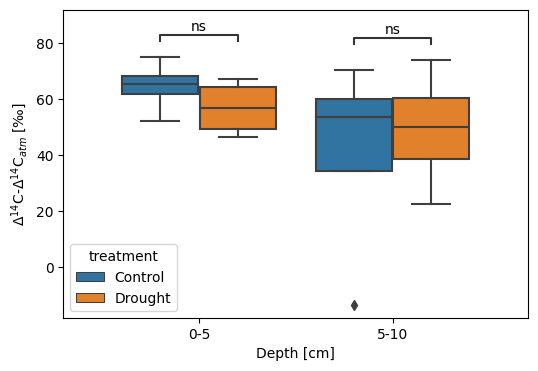

In [442]:
v='A'# F: F14C, D: D14C., A:D14C-D14C_atm

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'  
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
if v=='A':vv=data.D; tity='$\Delta^{14}$C-$\Delta^{14}$C$_{atm}$ [‰]'

fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

pairs = [
    [('0-5', 'Control'), ('0-5', 'Drought')],
    [('5-10', 'Control'), ('5-10', 'Drought')],
]

states_palette = sns.color_palette("tab10", n_colors=2)
states_order = treat
subcat_order = depths
hue_plot_params = {
    'data': data,
    'x': "depth",
    'y': vv,
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs.set_ylabel(tity);axs.set_xlabel('Depth [cm]')
##t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene*, Wilcoxon, Kruskal, Brunner-Munzel

### Comparison $\Delta^{14}$C incubations and field respiration

/home/_ehoyos/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


Text(0.5, 1.0, 'Drought')

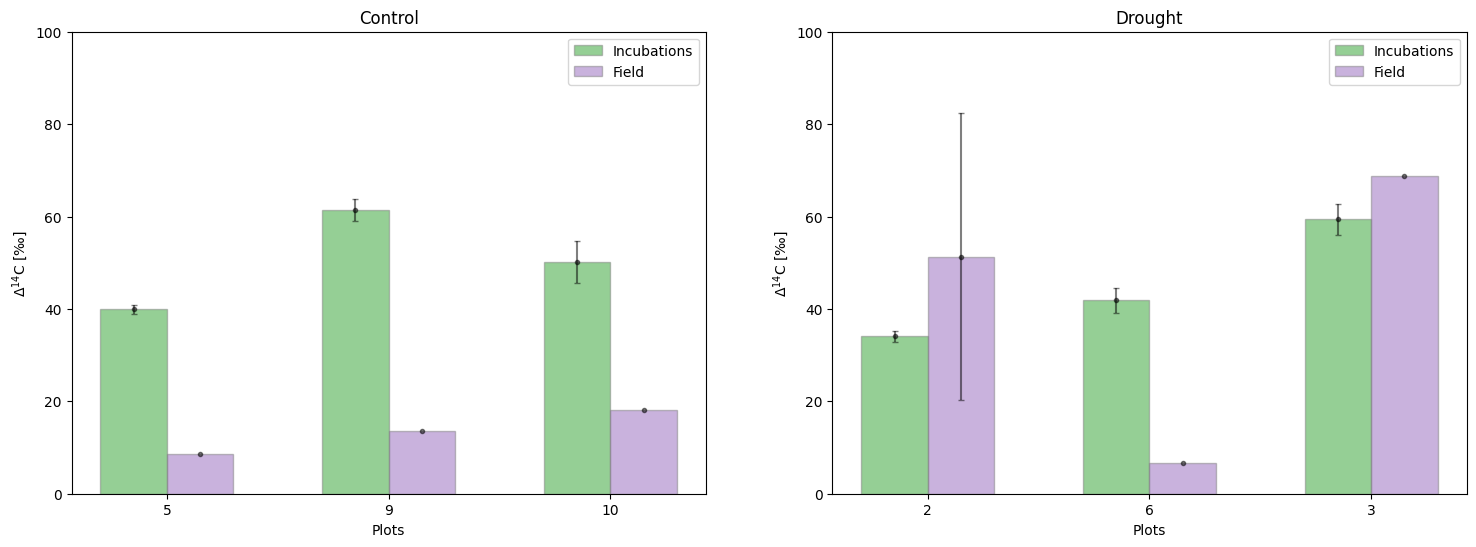

In [445]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'; x1=0.95; x2=1.12
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'; x1=0; x2=100 

## removing very negative values from field values:
conf=conf[conf[conf.columns[4]]>-300]; drof=drof[drof[drof.columns[4]]>-300]

comp=['Incubations','Field']
control2=conf['plot'].unique();drought2=drof['plot'].unique()
res1=np.empty([3,2]);std1=np.empty([3,2]) # control
res2=np.empty([3,2]);std2=np.empty([3,2]) # drought
for i in range(3):
    w=con[con['plot']==control2[i]];res1[i,0]=w[vv].mean();std1[i,0]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    w=conf[conf['plot']==control2[i]];res1[i,1]=w[vv].mean();std1[i,1]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    
    w=dro[dro['plot']==drought2[i]];res2[i,0]=w[vv].mean();std2[i,0]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    w=drof[drof['plot']==drought2[i]];res2[i,1]=w[vv].mean();std2[i,1]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    
fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
treat=['Control','Drought']

barWidth=0.3
br1=np.arange(3)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

for i in range(2):
    axs[0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=comp[i],color=colors[i+2],alpha=0.5) 
    axs[0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=comp[i],color=colors[i+2],alpha=0.5) 
    axs[1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[i].set_ylabel(tity); axs[i].set_xlabel('Plots')
    
    axs[i].set_ylim(x1,x2)

axs[0].legend(); axs[1].legend()
axs[0].set_xticks([r+barWidth/2 for r in range(len(control2))],control2)
axs[1].set_xticks([r+barWidth/2 for r in range(len(drought2))],drought2)
axs[0].set_title('Control');axs[1].set_title('Drought')


##### Statistic test

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Drought_Incubations vs. Drought_Field: Brunner-Munzel test, P_val:9.161e-01 W=1.142e-01
Control_Incubations vs. Control_Field: Brunner-Munzel test, P_val:1.994e-02 W=-3.000e+00


Text(0.5, 14.722222222222216, 'Treatment [cm]')

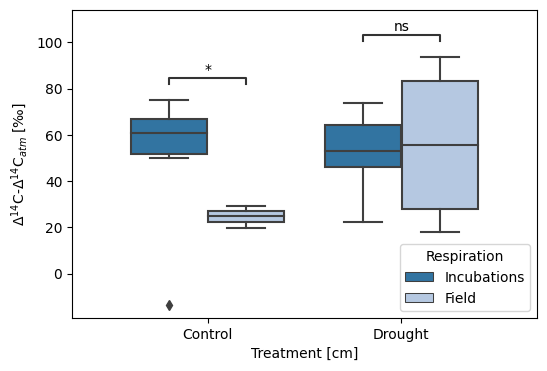

In [452]:
v='A'# F: F14C, D: D14C., A: D14C-D14atm

dataf=dataf[dataf[dataf.columns[4]]>-300] # remove very negative values.
a=['Incubations']*len(datai);b=['Field']*len(dataf)
datai['Respiration']=a; dataf['Respiration']=b
dataif=pd.concat([datai,dataf])

if v=='F': vv=dataif.columns[2];tity='F$^{14}$C [-]'  
if v=='D': vv=dataif.columns[4];tity='$\Delta^{14}$C [‰]'
if v=='A': vv=dataif.D; tity='$\Delta^{14}$C-$\Delta^{14}$C$_{atm}$ [‰]'

fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

pairs = [
    [('Control', 'Incubations'), ('Control', 'Field')],
    [('Drought', 'Incubations'), ('Drought', 'Field')],
]

states_palette = sns.color_palette("tab20", n_colors=2)
states_order = ['Incubations','Field']
subcat_order = treat
hue_plot_params = {
    'data': dataif,
    'x': "treatment",
    'y': vv,
    "order": subcat_order,
    "hue": "Respiration",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Brunner-Munzel').apply_and_annotate()
axs.set_ylabel(tity);axs.set_xlabel('Treatment [cm]')
##t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene*, Wilcoxon, Kruskal, Brunner-Munzel

### Solids -- Soils

In [453]:
data=pd.read_excel('Data/LabResults/Soil_solids.xlsx',header=30)

temp=re.compile("([a-zA-Z]+)([0-9]+)")
plot=np.empty(len(data),dtype=int); depth=['']*len(data); treat=['']*len(data)
for i in range(len(data)):
    b=data['Probe'][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
    depth[i]=(data['Probe'][i].split('_')[-1]).split(' ')[-1]
    if plot[i] in control: treat[i]='Control'
    if plot[i] in drought: treat[i]='Drought'
    
data['plot']=plot; data['depth']=depth; data['treatment']=treat 
depths=data.depth.unique()
w=depths[1]; depths[1]=depths[2]; depths[2]=w
b=data[data.columns[4]]-D14C_at # substract D14C atmospheric
data['D']=b
con=data[data['plot'].isin(control)] 
dro=data[data['plot'].isin(drought)] 

/home/_ehoyos/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


Text(0.5, 1.0, 'Drought')

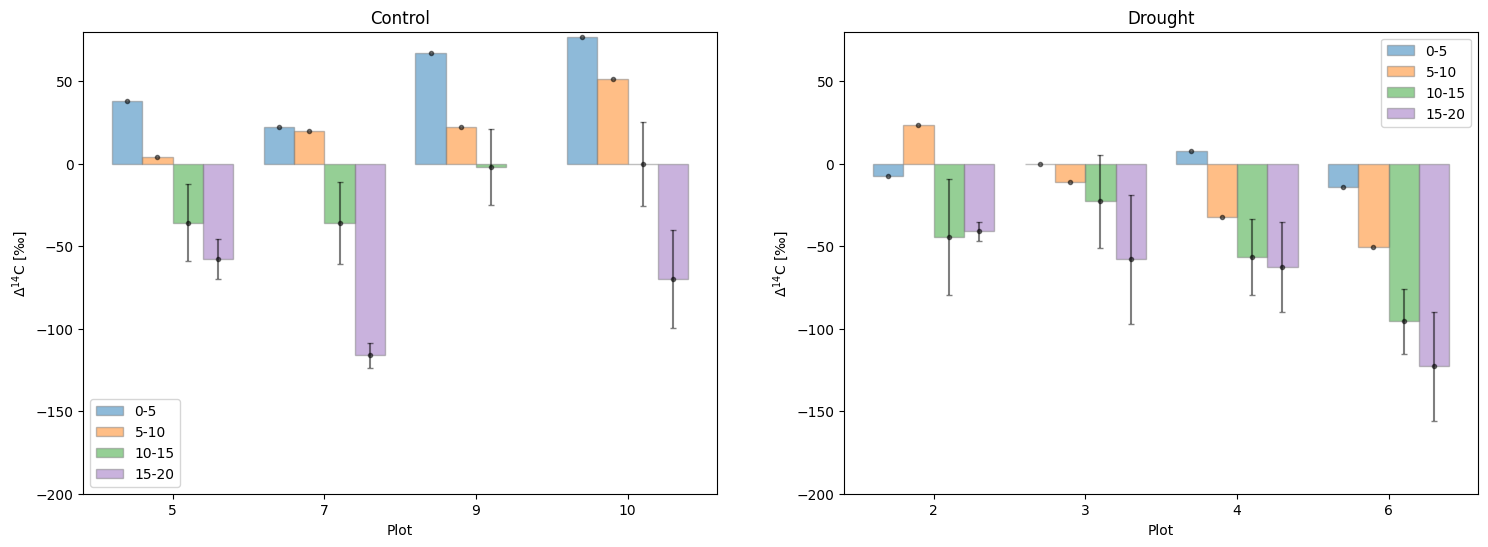

In [454]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'; x1=0.8; x2=1.10
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'; x1=-200; x2=80 

fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))

barWidth=0.20
br1=np.arange(len(depths))
br2=[x+barWidth for x in br1] 
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]
br=[br1,br2,br3,br4]

res1=np.zeros([4,len(depths)])*np.nan; std1=np.zeros([4,len(depths)])*np.nan
res2=np.zeros([4,len(depths)])*np.nan; std2=np.zeros([4,len(depths)])*np.nan
for i in range(4):
    for j in range(len(depths)):
        w=con[(con['plot']==control[i])&(con['depth']==depths[j])]
        res1[i,j]=w[vv].mean();std1[i,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
        w=dro[(dro['plot']==drought[i])&(dro['depth']==depths[j])]
        res2[i,j]=w[vv].mean();std2[i,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))

for i in range(len(depths)):
    axs[0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)

for i in range(2):
    axs[i].legend(); axs[i].set_ylabel(tity); axs[i].set_xlabel('Plot');axs[i].set_ylim(x1,x2)
    if v=='F':axs[i].axhline(1,color='gray',linestyle='--'); axs[1].axhline(1,color='gray',linestyle='--') 
axs[0].set_xticks([r+barWidth*1.5 for r in range(len(control))],control)
axs[1].set_xticks([r+barWidth*1.5 for r in range(len(drought))],drought)
axs[0].set_title('Control'); axs[1].set_title('Drought')

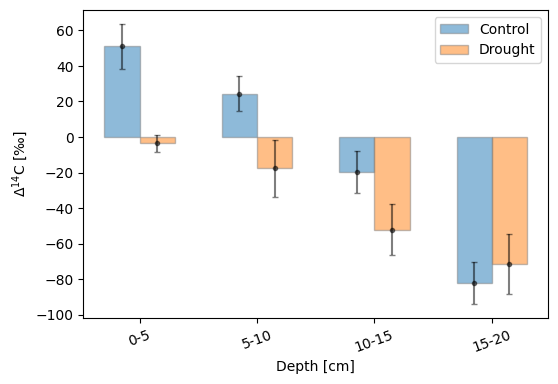

In [455]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'

fig,axs=plt.subplots(figsize=[6,4])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
treat=['Control','Drought']

barWidth=0.3
br=np.arange(4)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

res=np.zeros([2,len(depths)])*np.nan; std=np.zeros([2,len(depths)])*np.nan
for j in range(len(depths)):
    w=con[con['depth']==depths[j]]
    res[0,j]=w[vv].mean();std[0,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    w=dro[dro['depth']==depths[j]]
    res[1,j]=w[vv].mean();std[1,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
for i in range(2):
    plt.bar(br[i],res[i,:],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    plt.errorbar(br[i],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
plt.legend()
plt.xticks([r+barWidth/2 for r in range(len(depths))],depths,rotation=20)
plt.ylabel(tity);plt.xlabel('Depth [cm]')
if v=='F':plt.axhline(1,color='gray',linestyle='--')

##### statistic test

In [293]:
data

,P-Nr.,Probe,F14C,err,∆14C (‰),err (‰),remark,plot,depth,treatment
0,36843,PD_P10_S 0-5,1.0862,0.0022,76.5,2.2,NaN,10,0-5,Control
1,36844,PD_P9_S_1 10-15,1.0561,0.0021,46.7,2.1,NaN,9,10-15,Control
2,36845,PD_P9_S 0-5,1.0769,0.0022,67.3,2.2,NaN,9,0-5,Control
3,36846,PD_P5_S 0-5,1.0476,0.0022,38.3,2.2,NaN,5,0-5,Control
4,36847,PD_P10_S 5-10,1.0606,0.0024,51.2,2.4,NaN,10,5-10,Control
...,...,...,...,...,...,...,...,...,...,...
65,36908,PD_P3_S_9 10-15,0.9634,0.0024,-45.2,2.4,NaN,3,10-15,Drought
66,36909,PD_P3_S_11 15-20,0.8939,0.0023,-114.1,2.3,NaN,3,15-20,Drought
67,36910,PD_P7_S_16 10-15,0.9005,0.0023,-107.5,2.3,NaN,7,10-15,Control
68,36911,PD_P3_S_11 10-15,0.9710,0.0024,-37.7,2.4,NaN,3,10-15,Drought


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10-15_Control vs. 10-15_Drought: Mann-Whitney-Wilcoxon test two-sided, P_val:8.149e-02 U_stat=1.550e+02
0-5_Control vs. 0-5_Drought: Mann-Whitney-Wilcoxon test two-sided, P_val:2.857e-02 U_stat=1.600e+01
5-10_Control vs. 5-10_Drought: Mann-Whitney-Wilcoxon test two-sided, P_val:2.000e-01 U_stat=1.300e+01
15-20_Control vs. 15-20_Drought: Mann-Whitney-Wilcoxon test two-sided, P_val:6.021e-01 U_stat=6.200e+01


Text(0.5, 14.722222222222216, 'Depth [cm]')

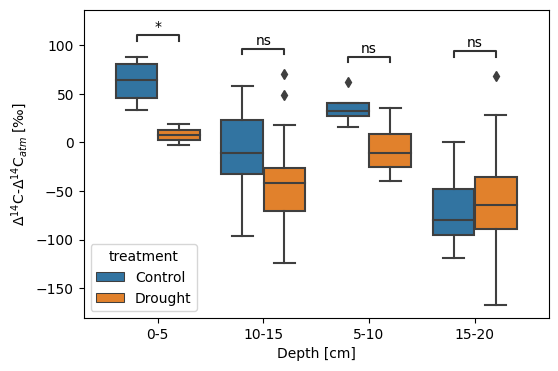

In [456]:
v='A'# F: F14C, D: D14C. A: D14C-D14Catm

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
if v=='A': vv=data.D; tity='$\Delta^{14}$C-$\Delta^{14}$C$_{atm}$ [‰]'

fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

pairs = [
    [('0-5', 'Control'), ('0-5', 'Drought')],
    [('5-10', 'Control'), ('5-10', 'Drought')],
    [('10-15', 'Control'), ('10-15', 'Drought')],
    [('15-20', 'Control'), ('15-20', 'Drought')],
]

depths=data.depth.unique()
states_palette=sns.color_palette("tab10", n_colors=2)
states_order=treat
subcat_order=depths
hue_plot_params = {
    'data':data,
    'x': "depth",
    'y': vv,
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Mann-Whitney').apply_and_annotate()
axs.set_ylabel(tity);axs.set_xlabel('Depth [cm]')
##t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene*, Wilcoxon, Kruskal, Brunner-Munzel

### $\delta$13C -- roots and litter

Text(0.5, 1.0, 'Course litter, drought plots')

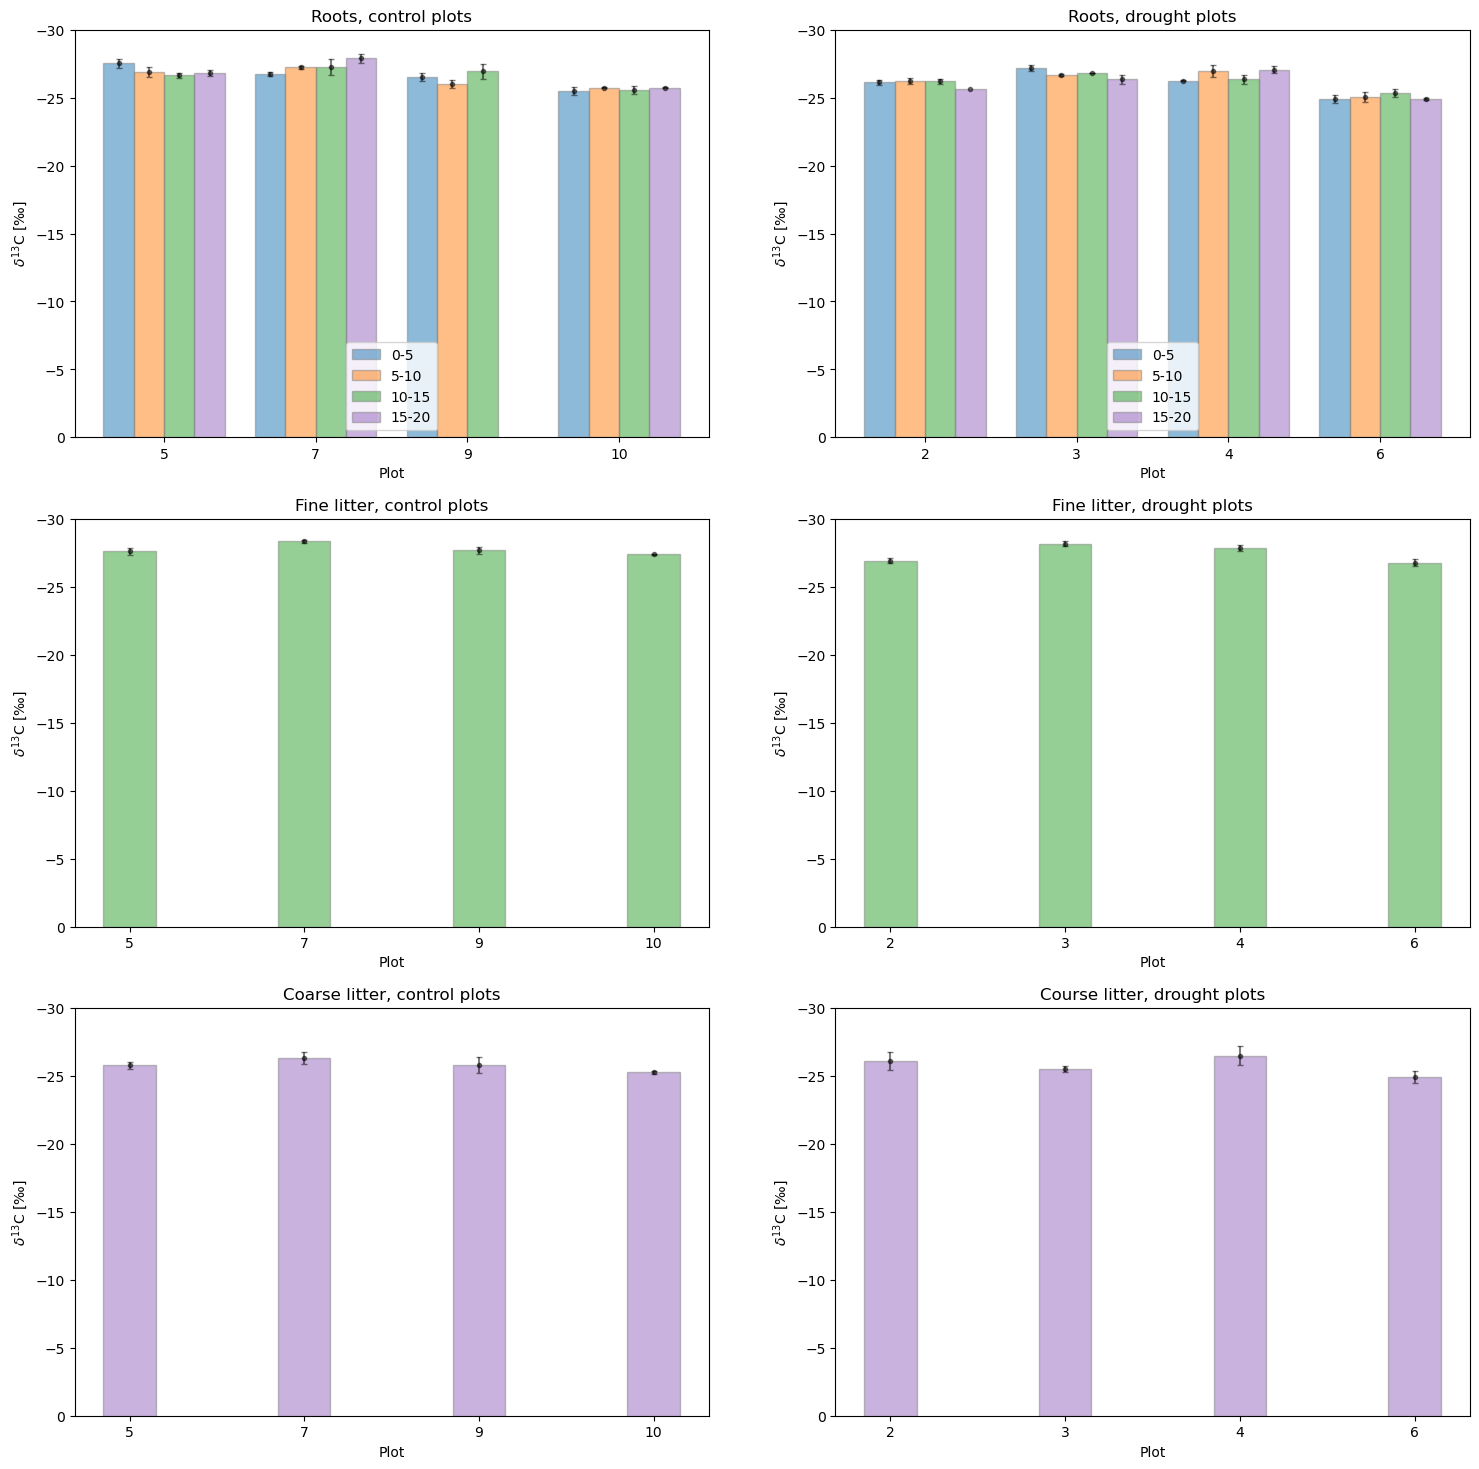

In [411]:
fig,axs=plt.subplots(3,2,figsize=[18,18])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
barWidth=0.20
vv=roots.columns[17] # d13C.

## Roots
depths=roots.depth.unique()
df=roots
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)] 

res1=np.zeros([4,len(depths)])*np.nan; std1=np.zeros([4,len(depths)])*np.nan
res2=np.zeros([4,len(depths)])*np.nan; std2=np.zeros([4,len(depths)])*np.nan
for i in range(4):
    for j in range(len(depths)):
        w=con[(con['plot']==control[i])&(con['depth']==depths[j])]
        res1[i,j]=w[vv].mean();std1[i,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
        w=dro[(dro['plot']==drought[i])&(dro['depth']==depths[j])]
        res2[i,j]=w[vv].mean();std2[i,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))

br1=np.arange(len(depths))
br2=[x+barWidth for x in br1] 
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]
br=[br1,br2,br3,br4]

for i in range(len(depths)):
    axs[0,0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0,0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[0,1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0,1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0,0].legend();axs[0,1].legend()
axs[0,0].set_xticks([r+barWidth*1.5 for r in range(len(control))],control)
axs[0,1].set_xticks([r+barWidth*1.5 for r in range(len(drought))],drought)
axs[0,0].set_ylabel(u'$\delta^{13}$C [‰]');axs[0,1].set_ylabel(u'$\delta^{13}$C [‰]')
axs[0,0].set_xlabel('Plot'); axs[0,1].set_xlabel('Plot')
axs[0,0].set_title('Roots, control plots'); axs[0,1].set_title('Roots, drought plots')
axs[0,0].set_ylim(0,-30); axs[0,1].set_ylim(0,-30)

# Fine litter
df=litterF
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)] 

res=np.zeros([2,4])*np.nan; std=np.zeros([2,4])*np.nan
#res2=np.zeros(4)*np.nan; std2=np.zeros(4)*np.nan
for i in range(4):
    w=con[con['plot']==control[i]]
    res[0,i]=w[vv].mean();std[0,i]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    w=dro[dro['plot']==drought[i]]
    res[1,i]=w[vv].mean();std[1,i]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
for i in range(2):
    axs[1,i].bar(br[0],res[i,:],width=barWidth+.1,edgecolor='grey',color=colors[2],alpha=0.5) 
    axs[1,i].errorbar(br[0],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[1,i].set_ylabel(u'$\delta^{13}$C [‰]'); axs[1,i].set_xlabel('Plot'); axs[1,i].set_ylim(0,-30)
axs[1,0].set_xticks([r for r in range(len(control))],control)
axs[1,1].set_xticks([r for r in range(len(drought))],drought)
axs[1,0].set_title('Fine litter, control plots'); axs[1,1].set_title('Fine litter, drought plots')

# Course litter
df=litterC
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)] 

res=np.zeros([2,4])*np.nan; std=np.zeros([2,4])*np.nan
for i in range(4):
    w=con[con['plot']==control[i]]
    res[0,i]=w[vv].mean();std[0,i]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    w=dro[dro['plot']==drought[i]]
    res[1,i]=w[vv].mean();std[1,i]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
for i in range(2):
    axs[2,i].bar(br[0],res[i,:],width=barWidth+.1,edgecolor='grey',color=colors[3],alpha=0.5) 
    axs[2,i].errorbar(br[0],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[2,i].set_ylabel(u'$\delta^{13}$C [‰]'); axs[2,i].set_xlabel('Plot'); axs[2,i].set_ylim(0,-30)
axs[2,0].set_xticks([r for r in range(len(control))],control)
axs[2,1].set_xticks([r for r in range(len(drought))],drought)
axs[2,0].set_title('Coarse litter, control plots'); axs[2,1].set_title('Course litter, drought plots')

(0.0, -30.0)

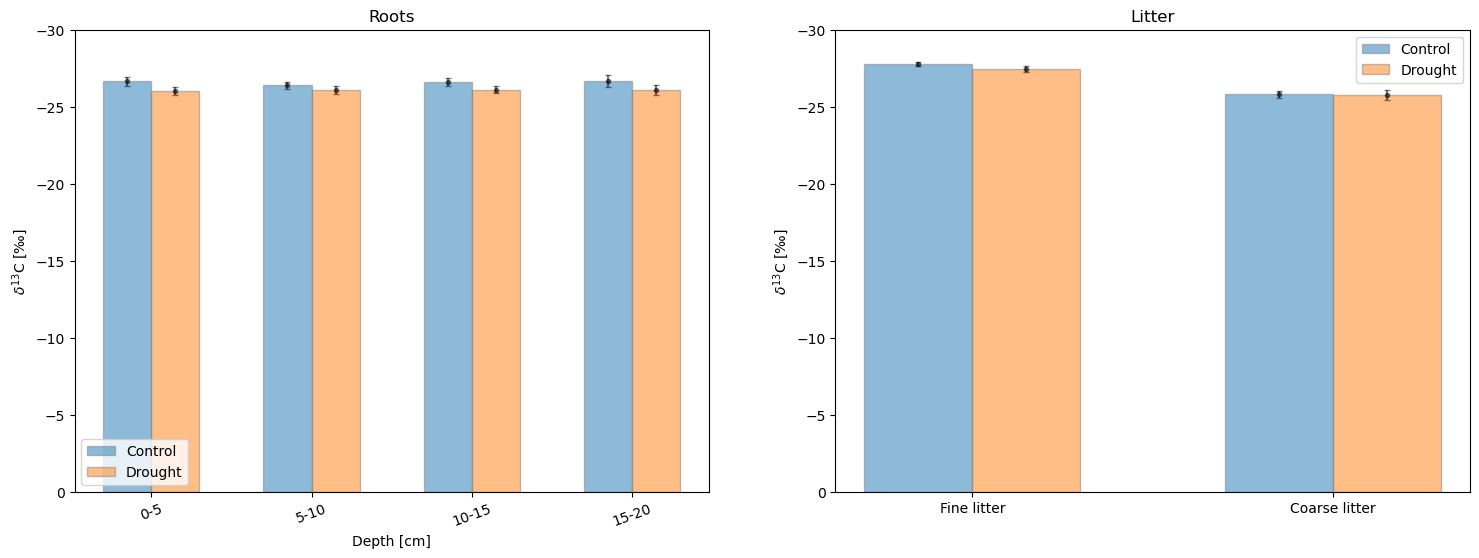

In [412]:
fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
barWidth=0.20
vv=roots.columns[17] # d13C.

# Roots
depths=roots.depth.unique()
df=roots
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)]

res=np.zeros([2,len(depths)])*np.nan; std=np.zeros([2,len(depths)])*np.nan
for j in range(len(depths)):
    w=con[con['depth']==depths[j]]
    res[0,j]=w[vv].mean();std[0,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    w=dro[dro['depth']==depths[j]]
    res[1,j]=w[vv].mean();std[1,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))

treat=['Control','Drought']
barWidth=0.3
br1=np.arange(4)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

for i in range(2):
    axs[0].bar(br[i],res[i,:],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    axs[0].errorbar(br[i],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0].legend()
axs[0].set_xticks([r+barWidth/2 for r in range(len(depths))],depths,rotation=20)
axs[0].set_ylabel(u'$\delta^{13}$C [‰]');axs[0].set_xlabel('Depth [cm]')
axs[0].set_title('Roots')
axs[0].set_ylim(0,-30)


## Litter
res=np.zeros([2,2])*np.nan; std=np.zeros([2,4])*np.nan
df=litterF
con=df[df['plot'].isin(control)]; dro=df[df['plot'].isin(drought)] 
res[0,0]=con[vv].mean();std[0,0]=con[vv].std()/np.sqrt(len(con[~con[vv].isna()]))
res[0,1]=dro[vv].mean();std[0,1]=dro[vv].std()/np.sqrt(len(dro[~dro[vv].isna()]))
df=litterC
con=df[df['plot'].isin(control)]; dro=df[df['plot'].isin(drought)] 
res[1,0]=con[vv].mean();std[1,0]=con[vv].std()/np.sqrt(len(con[~con[vv].isna()]))
res[1,1]=dro[vv].mean();std[1,1]=dro[vv].std()/np.sqrt(len(dro[~dro[vv].isna()]))

barWidth=0.3
br1=np.arange(2)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

for i in range(2):
    axs[1].bar(br[i],res[:,i],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    axs[1].errorbar(br[i],res[:,i],std[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[1].legend()
axs[1].set_xticks([r+barWidth/2 for r in range(2)],['Fine litter','Coarse litter'])
axs[1].set_ylabel(u'$\delta^{13}$C [‰]')
axs[1].set_title('Litter')
axs[1].set_ylim(0,-30)

### CO$_2$ Concentrations

In [413]:
data=pd.read_excel('Data/LabResults/Air_CO2_Results.xls')
plot=np.empty(len(data),dtype=int)
for i in range(len(data)):plot[i]=data['sample description'][0].split('_')[3]
data['plot']=plot
heights=data.height.unique()
con=data[data.Experiment=='Control']; dro=data[data.Experiment=='Drought']

/home/_ehoyos/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/home/_ehoyos/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/home/_ehoyos/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
/home/_ehoyos/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
/home/_e

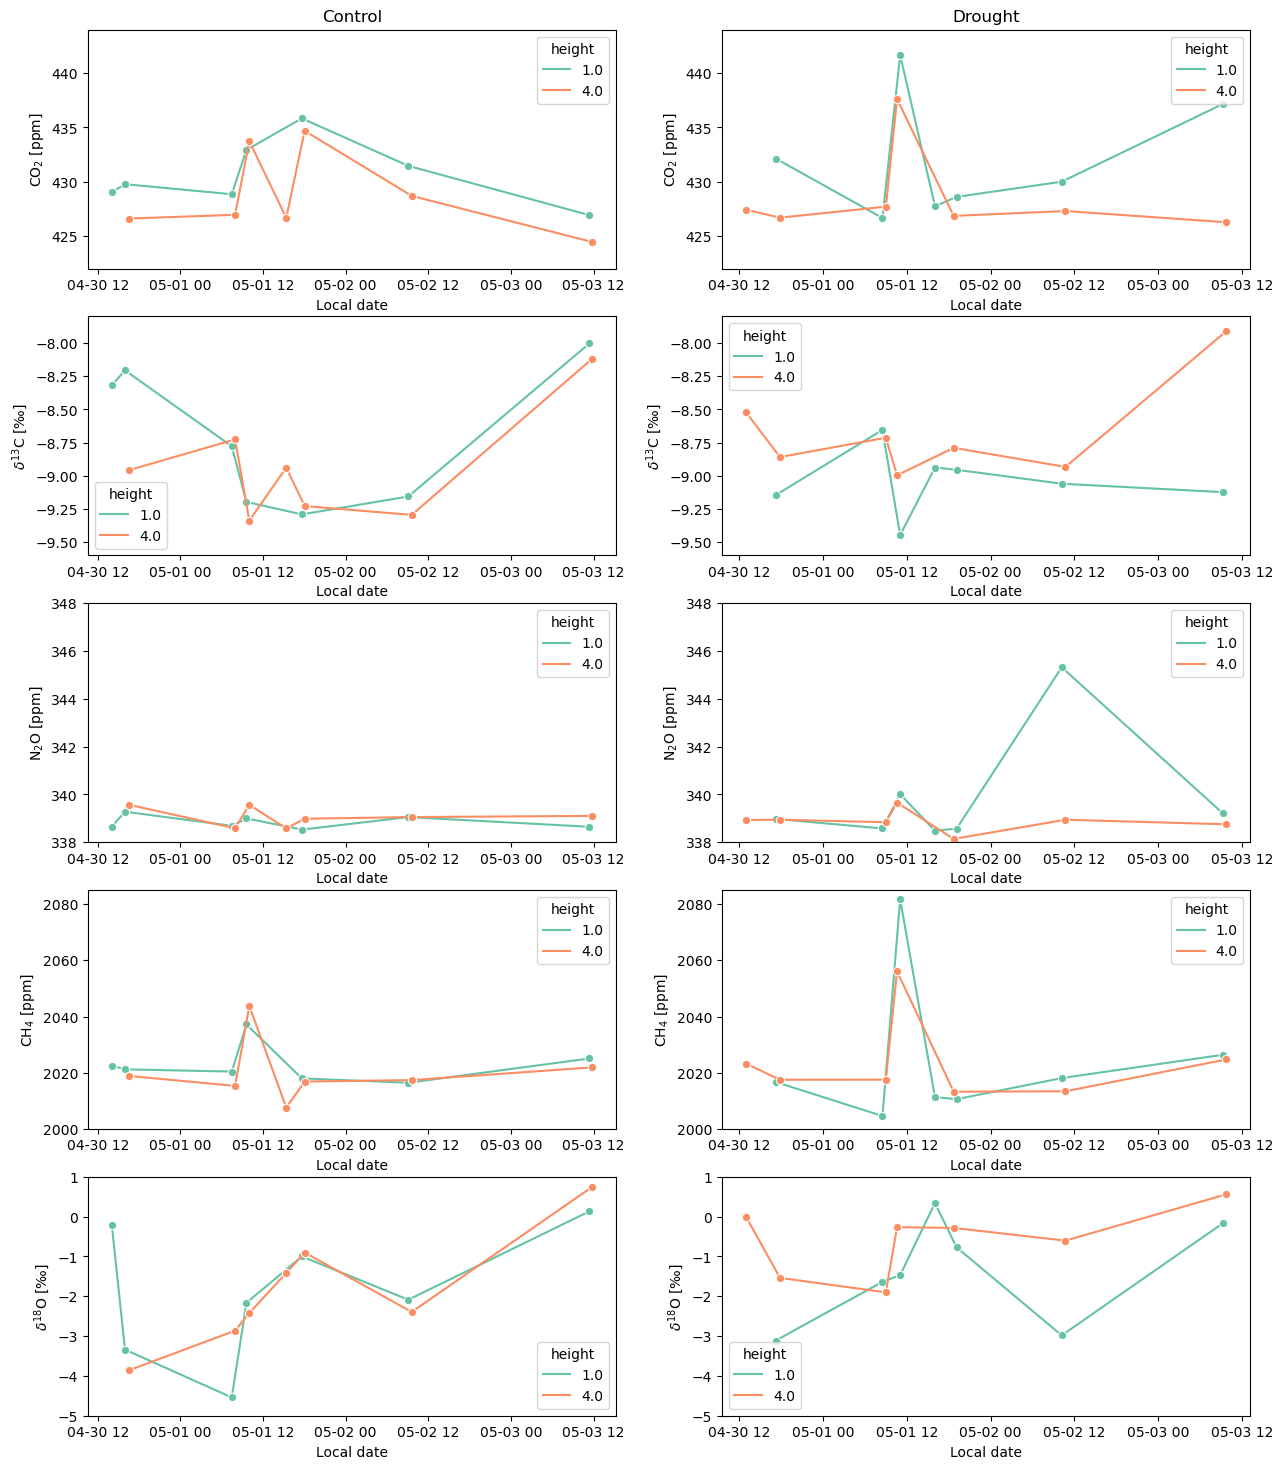

In [414]:
fig,axs=plt.subplots(5,2,figsize=(15,18))
palette=sns.color_palette("Set2",2)

axs[0,0].set_title('Control'); axs[0,1].set_title('Drought')
# CO2
sns.lineplot(data=con,x="sampling time",y="CO2",hue="height",marker="o",palette=palette,ax=axs[0,0])
sns.lineplot(data=dro,x="sampling time",y="CO2",hue="height",marker="o",palette=palette,ax=axs[0,1])
for i in range(2):axs[0,i].set_xlabel('Local date'); axs[0,i].set_ylabel(r'CO$_{2}$ [ppm]');axs[0,i].set_ylim(422,444)
# d13C
sns.lineplot(data=con,x="sampling time",y="d13C",hue="height",marker="o",palette=palette,ax=axs[1,0])
sns.lineplot(data=dro,x="sampling time",y="d13C",hue="height",marker="o",palette=palette,ax=axs[1,1])
for i in range(2):axs[1,i].set_xlabel('Local date'); axs[1,i].set_ylabel(r'$\delta^{13}$C [‰]'),axs[1,i].set_ylim(-9.6,-7.8)
    
# N2O
sns.lineplot(data=con,x="sampling time",y="N2O",hue="height",marker="o",palette=palette,ax=axs[2,0])
sns.lineplot(data=dro,x="sampling time",y="N2O",hue="height",marker="o",palette=palette,ax=axs[2,1])
for i in range(2):axs[2,i].set_xlabel('Local date'); axs[2,i].set_ylabel(r'N$_2$O [ppm]');axs[2,i].set_ylim(338,348)

# CH4
sns.lineplot(data=con,x="sampling time",y="CH4",hue="height",marker="o",palette=palette,ax=axs[3,0])
sns.lineplot(data=dro,x="sampling time",y="CH4",hue="height",marker="o",palette=palette,ax=axs[3,1])
for i in range(2):axs[3,i].set_xlabel('Local date'); axs[3,i].set_ylabel(r'CH$_4$ [ppm]');axs[3,i].set_ylim(2000,2085)

# CH4
sns.lineplot(data=con,x="sampling time",y="d18O",hue="height",marker="o",palette=palette,ax=axs[4,0])
sns.lineplot(data=dro,x="sampling time",y="d18O",hue="height",marker="o",palette=palette,ax=axs[4,1])
for i in range(2):axs[4,i].set_xlabel('Local date'); axs[4,i].set_ylabel(r'$\delta^{18}$O [‰]');axs[4,i].set_ylim(-5,1)

(0.0, -4.0)

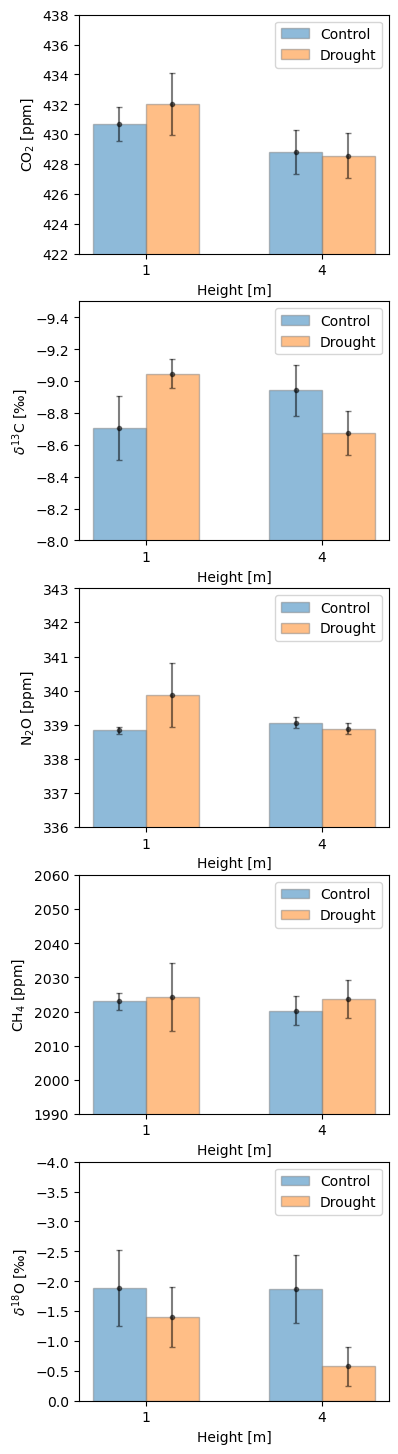

In [419]:
fig,axs=plt.subplots(5,figsize=(4,18))
heights=np.array([1,4]); treat=['Control','Drought']

barWidth=0.3
br1=np.arange(2)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

vv=['CO2','d13C','N2O','CH4','d18O']
tit=[r'CO$_{2}$ [ppm]',r'$\delta^{13}$C [‰]',r'N$_2$O [ppm]',r'CH$_4$ [ppm]',r'$\delta^{18}$O [‰]']
for i in range(5): # variables
    res=np.empty(2);std=np.empty(2)
    for j in range(2): # treatment
        for k in range(2): #heights
            res[k]=data[(data.height==heights[k])& (data.Experiment==treat[j])][vv[i]].mean()
            a=data[(data.height==heights[k])& (data.Experiment==treat[j])][vv[i]]
            std[k]=a.std()/np.sqrt(len(a[~a.isna()]))
        axs[i].bar(br[j],res,width=barWidth,edgecolor='grey',label=treat[j],color=colors[j],alpha=0.5) 
        axs[i].errorbar(br[j],res,std,fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[i].legend()
    axs[i].set_ylabel(tit[i]); axs[i].set_xlabel('Height [m]')
    axs[i].set_xticks([r+barWidth/2 for r in range(2)],heights)
    
axs[0].set_ylim(422,438)
axs[1].set_ylim(-8,-9.5)
axs[2].set_ylim(336,343)
axs[3].set_ylim(1990,2060)
axs[4].set_ylim(0,-4)
